In [1]:
import numpy as np
import math

# Вычислительные эксперименты, иллюстрирующие явление концентрации равномерной меры на поверхности евклидовой сферы в малой окрестности экватора

<i>Статья:</i>
<br/>
<i>Горбунов Э.А.</i>
<br/>
<i>МФТИ (Москва, Россия),</i>
<br/>
<i>Воронцова Е.А.</i>
<br/>
<i>ДВФУ (Владивосток, Россия),</i>
<br/>
<i>Усманова И.</i>
<br/>
<i>arxiv (in process)</i>

In [2]:
def montecarlo(f, X, q, n, eps, gr = False):
    """
    Function to compute the Monte Carlo estimate of the expectation
    E[f(X)], with N samples
   
    Inputs:
    f - a Python function that applies a chosen mathematical function to
    each entry in a numpy array
    X - a Python function that takes N as input and returns
    independent individually distributed random samples from a chosen
    probability distribution
    N - the number of samples to use
    q -- additional parametr for f
    """
    N = 2
    Fx = [f(X(n), q, n)]
    mc_err = eps
    mc_int = 1
    
    if gr:
        plt_estint = []
        plt_esterr = []
    while mc_err >= eps:
        
        Fx.append(f(X(n), q, n))
        mc_int = np.sum(Fx) / N
        mc_err = math.sqrt(sum(pow(Fx-mc_int, 2))) / N
        
        if gr:
            plt_estint.append(mc_int)
            plt_esterr.append(mc_err) 
        
        N += 1

    if gr:    
        
        %matplotlib notebook
        import matplotlib.pyplot as plt
        plt.grid(True)
        plt.plot(range(2, N), plt_estint, label = 'mc_int')
        twope = [2*pe for pe in plt_esterr]
        mtwope = [-2*pe for pe in plt_esterr]
        plt.plot(range(2, N), [sum(pe) for pe in zip(plt_estint, twope)])
        plt.plot(range(2, N), [sum(pe) for pe in zip(plt_estint, mtwope)])
        plt.legend()        

    return mc_int, N-1

In [3]:
def func(e, q, n):
    # Inputs:  
    # e - a numpy array of values
    # q - norm
    # n - length of e
    norm_e = np.linalg.norm(e, q)
    sq = norm_e*norm_e
    if q == np.inf:
        return sq  / pow(n, -1.0)
    else:    
        return sq  / pow(n, 2./q - 1)

In [4]:
# Generating uniformly distributed numbers on a sphere
def get_rand_vec(dims):
    e = np.random.standard_normal(int(dims))
    return e / np.linalg.norm(e)

In [5]:
nrange = range(10, int(1e5), 10)
narr = np.array(nrange)

plt1 = []
q = np.inf
for i, n in enumerate(narr):
    
    pract_estimate, N = montecarlo(func, get_rand_vec, q, n, 1e-1, False) 
    if q == np.inf:
        theor_estimate = 16*math.log(n) - 8 #* n2q
    else:
        theor_estimate = min([q - 1, 16*math.log(n) - 8]) #* n2q
    plt1.append(pract_estimate / theor_estimate)
    print('n = ', n, ', pract  = ', pract_estimate, ', from lemma = ', theor_estimate, N) 
        


n =  10 , pract  =  3.80771847473 , from lemma =  28.841361487904734 130
n =  20 , pract  =  4.88236391746 , from lemma =  39.931716376863854 203
n =  30 , pract  =  5.51083694008 , from lemma =  46.41915810659449 292
n =  40 , pract  =  6.19641690508 , from lemma =  51.02207126582298 312
n =  50 , pract  =  6.37520204518 , from lemma =  54.592368086850335 2
n =  60 , pract  =  6.8999930848 , from lemma =  57.50951299555361 394
n =  70 , pract  =  7.04305539259 , from lemma =  59.97592387278975 376
n =  80 , pract  =  7.36815988766 , from lemma =  62.1124261547821 420
n =  90 , pract  =  7.45387367664 , from lemma =  63.99695472528424 352
n =  100 , pract  =  7.54004919279 , from lemma =  65.68272297580947 357
n =  110 , pract  =  7.82188111641 , from lemma =  67.20768585267867 425
n =  120 , pract  =  8.11206727833 , from lemma =  68.59986788451273 400
n =  130 , pract  =  8.13653132879 , from lemma =  69.88055120728932 421
n =  140 , pract  =  6.76674537842 , from lemma =  71.0662787

n =  1150 , pract  =  12.2461334786 , from lemma =  104.76027554171674 514
n =  1160 , pract  =  12.2016787505 , from lemma =  104.89880454560657 532
n =  1170 , pract  =  12.0227701599 , from lemma =  105.03614444466884 559
n =  1180 , pract  =  12.3307799989 , from lemma =  105.17231547935536 585
n =  1190 , pract  =  12.2374640676 , from lemma =  105.3073373776892 543
n =  1200 , pract  =  12.0770813709 , from lemma =  105.44122937241747 521
n =  1210 , pract  =  12.5013203962 , from lemma =  105.57401021745258 558
n =  1220 , pract  =  12.4981058266 , from lemma =  105.70569820363684 599
n =  1230 , pract  =  12.279961612 , from lemma =  105.83631117386341 497
n =  1240 , pract  =  12.1712394256 , from lemma =  105.96586653758533 563
n =  1250 , pract  =  12.3026475756 , from lemma =  106.09438128474154 524
n =  1260 , pract  =  12.29573278 , from lemma =  106.22187199912838 606
n =  1270 , pract  =  12.6216358589 , from lemma =  106.3483548712422 562
n =  1280 , pract  =  12.29989

n =  2260 , pract  =  13.5665283268 , from lemma =  115.5699214762613 584
n =  2270 , pract  =  13.5492604736 , from lemma =  115.64056176760717 584
n =  2280 , pract  =  13.4094579591 , from lemma =  115.71089155117578 569
n =  2290 , pract  =  13.4066048141 , from lemma =  115.78091354477256 7
n =  2300 , pract  =  13.4875639135 , from lemma =  115.85063043067586 563
n =  2310 , pract  =  14.5969908277 , from lemma =  115.92004485625343 2
n =  2320 , pract  =  13.4793798007 , from lemma =  115.98915943456569 648
n =  2330 , pract  =  13.540530576 , from lemma =  116.05797674495594 493
n =  2340 , pract  =  13.5958418243 , from lemma =  116.12649933362795 503
n =  2350 , pract  =  13.5849451503 , from lemma =  116.19472971421128 631
n =  2360 , pract  =  13.5072237381 , from lemma =  116.26267036831449 622
n =  2370 , pract  =  13.449974666 , from lemma =  116.33032374606682 541
n =  2380 , pract  =  13.4293081648 , from lemma =  116.39769226664832 510
n =  2390 , pract  =  13.4492551

n =  3360 , pract  =  14.1090420939 , from lemma =  121.91514004731599 446
n =  3370 , pract  =  14.130624832 , from lemma =  121.9626883735425 593
n =  3380 , pract  =  14.2451665256 , from lemma =  122.01009581563304 485
n =  3390 , pract  =  14.2660082517 , from lemma =  122.05736320599195 560
n =  3400 , pract  =  14.0454080832 , from lemma =  122.10449136966804 560
n =  3410 , pract  =  14.023526293 , from lemma =  122.151481124441 494
n =  3420 , pract  =  14.0567608978 , from lemma =  122.19833328090641 495
n =  3430 , pract  =  14.1302672801 , from lemma =  122.24504864255977 546
n =  3440 , pract  =  13.7112800835 , from lemma =  122.29162800587912 2
n =  3450 , pract  =  14.3327813639 , from lemma =  122.33807216040648 616
n =  3460 , pract  =  14.1430707574 , from lemma =  122.38438188882833 550
n =  3470 , pract  =  14.033985855 , from lemma =  122.43055796705448 527
n =  3480 , pract  =  14.2383569396 , from lemma =  122.47660116429631 568
n =  3490 , pract  =  14.28122985

n =  4470 , pract  =  14.8719306795 , from lemma =  126.48229900172183 595
n =  4480 , pract  =  14.653857803 , from lemma =  126.5180532065445 610
n =  4490 , pract  =  14.7527085399 , from lemma =  126.55372769178081 659
n =  4500 , pract  =  14.8631554138 , from lemma =  126.58932281213458 596
n =  4510 , pract  =  14.631735899 , from lemma =  126.62483891994759 519
n =  4520 , pract  =  14.6417796734 , from lemma =  126.66027636522043 576
n =  4530 , pract  =  14.5259524733 , from lemma =  126.69563549563327 458
n =  4540 , pract  =  14.8813323024 , from lemma =  126.73091665656631 623
n =  4550 , pract  =  14.5433446428 , from lemma =  126.76612019111994 544
n =  4560 , pract  =  13.6166988064 , from lemma =  126.80124644013492 2
n =  4570 , pract  =  14.8275907604 , from lemma =  126.836295742212 628
n =  4580 , pract  =  14.715696256 , from lemma =  126.8712684337317 662
n =  4590 , pract  =  16.9626772161 , from lemma =  126.90616484887346 2
n =  4600 , pract  =  14.8902473141 

n =  5580 , pract  =  15.2801779402 , from lemma =  130.0311048860057 575
n =  5590 , pract  =  15.1773853068 , from lemma =  130.05975305838632 685
n =  5600 , pract  =  15.0101138597 , from lemma =  130.08835002757186 525
n =  5610 , pract  =  15.0793809751 , from lemma =  130.11689597626787 445
n =  5620 , pract  =  15.0145598489 , from lemma =  130.1453910862038 577
n =  5630 , pract  =  15.2117167363 , from lemma =  130.17383553813977 579
n =  5640 , pract  =  14.3677260186 , from lemma =  130.20222951187367 2
n =  5650 , pract  =  15.1449925875 , from lemma =  130.2305731862478 578
n =  5660 , pract  =  15.2565091497 , from lemma =  130.25886673915565 619
n =  5670 , pract  =  15.0919652893 , from lemma =  130.28711034754878 552
n =  5680 , pract  =  14.4524909783 , from lemma =  130.31530418744316 2
n =  5690 , pract  =  15.1035747893 , from lemma =  130.34344843392603 529
n =  5700 , pract  =  15.2356494189 , from lemma =  130.37154326116226 555
n =  5710 , pract  =  15.0192118

n =  6690 , pract  =  15.2997054552 , from lemma =  132.9339064499564 529
n =  6700 , pract  =  15.48135026 , from lemma =  132.9578048860649 534
n =  6710 , pract  =  15.3278227804 , from lemma =  132.98166767945165 522
n =  6720 , pract  =  15.7239077734 , from lemma =  133.0054949362751 621
n =  6730 , pract  =  15.54044187 , from lemma =  133.02928676222038 550
n =  6740 , pract  =  15.4183917114 , from lemma =  133.05304326250163 563
n =  6750 , pract  =  15.4467805997 , from lemma =  133.0767645418652 617
n =  6760 , pract  =  15.5919732449 , from lemma =  133.10045070459216 630
n =  6770 , pract  =  15.4203931701 , from lemma =  133.12410185450113 604
n =  6780 , pract  =  15.5390307213 , from lemma =  133.14771809495107 590
n =  6790 , pract  =  14.6550819176 , from lemma =  133.17129952884386 2
n =  6800 , pract  =  15.6606090586 , from lemma =  133.19484625862717 580
n =  6810 , pract  =  15.3438048001 , from lemma =  133.21835838629693 490
n =  6820 , pract  =  15.4098167775

n =  7800 , pract  =  15.789814564 , from lemma =  135.39006420284292 577
n =  7810 , pract  =  14.9970197372 , from lemma =  135.4105638853397 2
n =  7820 , pract  =  15.7137849682 , from lemma =  135.43103733662971 603
n =  7830 , pract  =  15.8559044003 , from lemma =  135.45148462375758 595
n =  7840 , pract  =  15.8087950454 , from lemma =  135.47190581351126 591
n =  7850 , pract  =  15.7974950055 , from lemma =  135.49230097242327 631
n =  7860 , pract  =  15.7775048382 , from lemma =  135.51267016677204 511
n =  7870 , pract  =  15.7531132051 , from lemma =  135.53301346258317 592
n =  7880 , pract  =  15.8120321385 , from lemma =  135.5533309256308 594
n =  7890 , pract  =  15.8645767408 , from lemma =  135.57362262143872 638
n =  7900 , pract  =  15.9144441088 , from lemma =  135.5938886152818 575
n =  7910 , pract  =  15.6741091864 , from lemma =  135.6141289721872 596
n =  7920 , pract  =  15.8582026029 , from lemma =  135.63434375693555 607
n =  7930 , pract  =  15.9323902

n =  8910 , pract  =  16.1197465262 , from lemma =  137.5188723274377 645
n =  8920 , pract  =  16.0314351034 , from lemma =  137.53681960918487 568
n =  8930 , pract  =  15.9191044417 , from lemma =  137.5547467819287 594
n =  8940 , pract  =  16.0777243391 , from lemma =  137.57265389068095 597
n =  8950 , pract  =  15.9487599191 , from lemma =  137.59054098030242 549
n =  8960 , pract  =  16.0399070457 , from lemma =  137.60840809550362 499
n =  8970 , pract  =  15.9453198097 , from lemma =  137.62625528084547 592
n =  8980 , pract  =  13.7498113784 , from lemma =  137.64408258073993 2
n =  8990 , pract  =  16.0347386758 , from lemma =  137.66189003945067 666
n =  9000 , pract  =  16.0607550727 , from lemma =  137.6796777010937 494
n =  9010 , pract  =  16.0756220682 , from lemma =  137.69744560963815 645
n =  9020 , pract  =  16.0407639732 , from lemma =  137.71519380890672 623
n =  9030 , pract  =  16.0063492816 , from lemma =  137.7329223425765 520
n =  9040 , pract  =  19.398706

n =  10010 , pract  =  16.2924163723 , from lemma =  139.38143795694825 587
n =  10020 , pract  =  16.0758140796 , from lemma =  139.3974139942217 566
n =  10030 , pract  =  16.2795254593 , from lemma =  139.4133740952957 708
n =  10040 , pract  =  16.2019844425 , from lemma =  139.42931829193154 496
n =  10050 , pract  =  16.3094747752 , from lemma =  139.44524661579555 558
n =  10060 , pract  =  16.1022818372 , from lemma =  139.4611590984597 482
n =  10070 , pract  =  16.0748204383 , from lemma =  139.47705577140172 646
n =  10080 , pract  =  16.1550210138 , from lemma =  139.49293666600576 539
n =  10090 , pract  =  16.278654312 , from lemma =  139.50880181356248 607
n =  10100 , pract  =  16.1823536103 , from lemma =  139.5246512452696 483
n =  10110 , pract  =  16.3445780077 , from lemma =  139.54048499223228 576
n =  10120 , pract  =  16.1849199213 , from lemma =  139.5563030854633 614
n =  10130 , pract  =  16.3288808103 , from lemma =  139.57210555588367 600
n =  10140 , pract

n =  11100 , pract  =  16.3723586264 , from lemma =  141.0352061968068 596
n =  11110 , pract  =  16.3807226758 , from lemma =  141.04961412213882 560
n =  11120 , pract  =  16.3785160663 , from lemma =  141.06400908487316 643
n =  11130 , pract  =  16.5458247531 , from lemma =  141.07839110831344 555
n =  11140 , pract  =  16.6367161945 , from lemma =  141.0927602157004 683
n =  11150 , pract  =  16.3370666647 , from lemma =  141.10711643021224 486
n =  11160 , pract  =  16.3984413158 , from lemma =  141.12145977496482 591
n =  11170 , pract  =  16.5701239044 , from lemma =  141.13579027301193 553
n =  11180 , pract  =  16.3058168017 , from lemma =  141.15010794734545 583
n =  11190 , pract  =  16.540195837 , from lemma =  141.16441282089554 624
n =  11200 , pract  =  16.4225955558 , from lemma =  141.17870491653096 574
n =  11210 , pract  =  16.4730594451 , from lemma =  141.1929842570593 582
n =  11220 , pract  =  16.5783876246 , from lemma =  141.207250865227 625
n =  11230 , pract

n =  12190 , pract  =  16.432885814 , from lemma =  142.53393955960507 468
n =  12200 , pract  =  16.7150838779 , from lemma =  142.54705969154156 672
n =  12210 , pract  =  16.794931148 , from lemma =  142.560169073676 699
n =  12220 , pract  =  16.6683448419 , from lemma =  142.57326772360938 695
n =  12230 , pract  =  16.7102926453 , from lemma =  142.5863556588995 614
n =  12240 , pract  =  16.6439132259 , from lemma =  142.59943289706106 583
n =  12250 , pract  =  16.562535797 , from lemma =  142.61249945556597 571
n =  12260 , pract  =  16.3133080625 , from lemma =  142.62555535184325 482
n =  12270 , pract  =  16.5771927239 , from lemma =  142.63860060327931 559
n =  12280 , pract  =  16.6403881693 , from lemma =  142.65163522721812 646
n =  12290 , pract  =  16.4924979029 , from lemma =  142.6646592409613 538
n =  12300 , pract  =  16.4892074466 , from lemma =  142.67767266176813 537
n =  12310 , pract  =  16.7589515788 , from lemma =  142.690675506856 606
n =  12320 , pract  =

n =  13280 , pract  =  16.7806584355 , from lemma =  143.9042307684868 679
n =  13290 , pract  =  16.7820352128 , from lemma =  143.91627442731667 616
n =  13300 , pract  =  16.9202472644 , from lemma =  143.92830902735753 535
n =  13310 , pract  =  16.7858300743 , from lemma =  143.9403345822265 570
n =  13320 , pract  =  16.801032976 , from lemma =  143.95235110551008 641
n =  13330 , pract  =  16.6911204116 , from lemma =  143.96435861076407 656
n =  13340 , pract  =  16.992499885 , from lemma =  143.97635711151383 633
n =  13350 , pract  =  16.7709355718 , from lemma =  143.98834662125432 578
n =  13360 , pract  =  16.9518118679 , from lemma =  144.0003271534502 671
n =  13370 , pract  =  16.9472371637 , from lemma =  144.0122987215358 624
n =  13380 , pract  =  16.7931166035 , from lemma =  144.02426133891552 546
n =  13390 , pract  =  16.7533385566 , from lemma =  144.0362150189635 593
n =  13400 , pract  =  16.8723801262 , from lemma =  144.04815977502403 599
n =  13410 , pract 

n =  14370 , pract  =  16.821132571 , from lemma =  145.16636766516913 566
n =  14380 , pract  =  16.8448299739 , from lemma =  145.1774981004006 542
n =  14390 , pract  =  16.9523643269 , from lemma =  145.18862079810262 607
n =  14400 , pract  =  16.7637768972 , from lemma =  145.19973576902547 545
n =  14410 , pract  =  16.7606838351 , from lemma =  145.2108430238971 576
n =  14420 , pract  =  16.9952044306 , from lemma =  145.22194257342304 614
n =  14430 , pract  =  17.0546797419 , from lemma =  145.23303442828666 602
n =  14440 , pract  =  16.959651662 , from lemma =  145.2441185991491 601
n =  14450 , pract  =  16.9878835205 , from lemma =  145.25519509664926 661
n =  14460 , pract  =  16.553034604 , from lemma =  145.2662639314041 2
n =  14470 , pract  =  16.9728795134 , from lemma =  145.27732511400848 580
n =  14480 , pract  =  16.9255950252 , from lemma =  145.28837865503533 575
n =  14490 , pract  =  16.7892184407 , from lemma =  145.29942456503565 567
n =  14500 , pract  =

n =  15460 , pract  =  16.8577779103 , from lemma =  146.33618115426262 571
n =  15470 , pract  =  17.1247695431 , from lemma =  146.3465270970738 592
n =  15480 , pract  =  17.1418466168 , from lemma =  146.35686635429948 513
n =  15490 , pract  =  17.0362131307 , from lemma =  146.36719893457462 586
n =  15500 , pract  =  17.2664821642 , from lemma =  146.37752484651742 628
n =  15510 , pract  =  16.8834239759 , from lemma =  146.38784409872935 604
n =  15520 , pract  =  16.8773513178 , from lemma =  146.39815669979535 575
n =  15530 , pract  =  17.1636772845 , from lemma =  146.40846265828372 617
n =  15540 , pract  =  17.0442843639 , from lemma =  146.41876198274622 540
n =  15550 , pract  =  17.0952000406 , from lemma =  146.42905468171807 520
n =  15560 , pract  =  17.1187815695 , from lemma =  146.43934076371812 568
n =  15570 , pract  =  17.1397602189 , from lemma =  146.4496202372487 491
n =  15580 , pract  =  17.2684152159 , from lemma =  146.45989311079583 637
n =  15590 , p

n =  16560 , pract  =  17.1523475555 , from lemma =  147.435926847028 520
n =  16570 , pract  =  17.1923117648 , from lemma =  147.44558576672975 536
n =  16580 , pract  =  17.2969056992 , from lemma =  147.45523885902858 661
n =  16590 , pract  =  17.365111677 , from lemma =  147.46488613095184 583
n =  16600 , pract  =  17.3726232749 , from lemma =  147.47452758951417 606
n =  16610 , pract  =  17.1413077727 , from lemma =  147.48416324171745 577
n =  16620 , pract  =  17.2795259649 , from lemma =  147.49379309455102 567
n =  16630 , pract  =  17.139130364 , from lemma =  147.50341715499158 563
n =  16640 , pract  =  17.0071351125 , from lemma =  147.51303543000319 600
n =  16650 , pract  =  17.2202336015 , from lemma =  147.52264792653745 638
n =  16660 , pract  =  17.3428740309 , from lemma =  147.53225465153335 572
n =  16670 , pract  =  17.0897295981 , from lemma =  147.54185561191744 610
n =  16680 , pract  =  17.3154488707 , from lemma =  147.5514508146038 541
n =  16690 , prac

n =  17650 , pract  =  17.420685231 , from lemma =  148.4558569977831 613
n =  17660 , pract  =  17.5195052559 , from lemma =  148.4649195865272 741
n =  17670 , pract  =  17.1826012187 , from lemma =  148.47397704501986 582
n =  17680 , pract  =  17.3084639612 , from lemma =  148.48302937906615 666
n =  17690 , pract  =  17.2356024362 , from lemma =  148.4920765944613 567
n =  17700 , pract  =  17.4582486174 , from lemma =  148.50111869699072 610
n =  17710 , pract  =  17.406970008 , from lemma =  148.51015569243006 605
n =  17720 , pract  =  17.2540663627 , from lemma =  148.51918758654514 580
n =  17730 , pract  =  17.4472117348 , from lemma =  148.52821438509207 668
n =  17740 , pract  =  17.2755485523 , from lemma =  148.5372360938171 613
n =  17750 , pract  =  17.4118614236 , from lemma =  148.546252718457 604
n =  17760 , pract  =  17.2976404162 , from lemma =  148.55526426473858 634
n =  17770 , pract  =  17.2516700628 , from lemma =  148.56427073837915 544
n =  17780 , pract  

n =  18740 , pract  =  17.4062336383 , from lemma =  149.4146488926786 567
n =  18750 , pract  =  17.388745317 , from lemma =  149.4231845023769 550
n =  18760 , pract  =  17.4287935208 , from lemma =  149.43171556096345 568
n =  18770 , pract  =  17.4611159277 , from lemma =  149.44024207328889 559
n =  18780 , pract  =  17.462557531 , from lemma =  149.44876404419605 563
n =  18790 , pract  =  17.2203623518 , from lemma =  149.45728147852017 606
n =  18800 , pract  =  17.456454766 , from lemma =  149.46579438108864 585
n =  18810 , pract  =  17.4785256127 , from lemma =  149.47430275672122 603
n =  18820 , pract  =  14.2352517745 , from lemma =  149.48280661022994 2
n =  18830 , pract  =  17.4699316365 , from lemma =  149.49130594641917 690
n =  18840 , pract  =  17.4953912819 , from lemma =  149.49980077008567 602
n =  18850 , pract  =  17.5172020151 , from lemma =  149.50829108601852 640
n =  18860 , pract  =  17.3243378998 , from lemma =  149.51677689899918 483
n =  18870 , pract 

n =  19830 , pract  =  17.5426862189 , from lemma =  150.31921954422145 564
n =  19840 , pract  =  17.5705100733 , from lemma =  150.32728609342183 646
n =  19850 , pract  =  17.5418648639 , from lemma =  150.3353485778454 613
n =  19860 , pract  =  17.3950379458 , from lemma =  150.34340700158663 489
n =  19870 , pract  =  17.6037705524 , from lemma =  150.3514613687338 597
n =  19880 , pract  =  17.510849198 , from lemma =  150.35951168336905 666
n =  19890 , pract  =  17.4938277139 , from lemma =  150.3675579495683 570
n =  19900 , pract  =  17.478234142 , from lemma =  150.37560017140135 587
n =  19910 , pract  =  17.5410563653 , from lemma =  150.38363835293188 562
n =  19920 , pract  =  17.4012751435 , from lemma =  150.39167249821742 671
n =  19930 , pract  =  17.4287093661 , from lemma =  150.39970261130944 572
n =  19940 , pract  =  17.4467664445 , from lemma =  150.40772869625326 500
n =  19950 , pract  =  17.5427926559 , from lemma =  150.41575075708815 530
n =  19960 , prac

n =  20920 , pract  =  17.4905714989 , from lemma =  151.17537469086176 505
n =  20930 , pract  =  17.7827688021 , from lemma =  151.18302104704074 595
n =  20940 , pract  =  17.5553193206 , from lemma =  151.19066375079245 606
n =  20950 , pract  =  17.6645763777 , from lemma =  151.19830280560453 554
n =  20960 , pract  =  17.3588961625 , from lemma =  151.20593821495964 523
n =  20970 , pract  =  17.5890071202 , from lemma =  151.21356998233546 648
n =  20980 , pract  =  17.5122735521 , from lemma =  151.22119811120461 567
n =  20990 , pract  =  16.5743057381 , from lemma =  151.22882260503485 2
n =  21000 , pract  =  16.5886724124 , from lemma =  151.23644346728895 2
n =  21010 , pract  =  17.6920578726 , from lemma =  151.24406070142473 703
n =  21020 , pract  =  17.4762498897 , from lemma =  151.25167431089508 562
n =  21030 , pract  =  17.4700951396 , from lemma =  151.25928429914794 546
n =  21040 , pract  =  17.6920646311 , from lemma =  151.26689066962635 595
n =  21050 , pra

n =  22010 , pract  =  17.5122591814 , from lemma =  151.9880347923281 504
n =  22020 , pract  =  17.7226031947 , from lemma =  151.99530256442674 540
n =  22030 , pract  =  17.9267912696 , from lemma =  152.00256703674222 618
n =  22040 , pract  =  17.7474493715 , from lemma =  152.0098282122696 569
n =  22050 , pract  =  17.8251092193 , from lemma =  152.01708609399986 613
n =  22060 , pract  =  17.708109948 , from lemma =  152.0243406849199 635
n =  22070 , pract  =  17.6698571171 , from lemma =  152.0315919880125 520
n =  22080 , pract  =  17.7417435389 , from lemma =  152.0388400062565 556
n =  22090 , pract  =  17.4805830395 , from lemma =  152.04608474262662 547
n =  22100 , pract  =  17.7131859548 , from lemma =  152.0533262000935 546
n =  22110 , pract  =  17.789799481 , from lemma =  152.06056438162386 645
n =  22120 , pract  =  17.4495652455 , from lemma =  152.06779929018035 568
n =  22130 , pract  =  17.6950124448 , from lemma =  152.07503092872153 597
n =  22140 , pract  

n =  23100 , pract  =  17.7579193134 , from lemma =  152.76140634415816 528
n =  23110 , pract  =  17.6761382508 , from lemma =  152.76833125229481 570
n =  23120 , pract  =  17.7873512289 , from lemma =  152.77525316458102 586
n =  23130 , pract  =  17.8880179747 , from lemma =  152.78217208360775 593
n =  23140 , pract  =  17.5226768309 , from lemma =  152.7890880119627 455
n =  23150 , pract  =  17.854331626 , from lemma =  152.7960009522301 572
n =  23160 , pract  =  17.9063787067 , from lemma =  152.80291090699092 689
n =  23170 , pract  =  17.9655295892 , from lemma =  152.80981787882274 637
n =  23180 , pract  =  17.6631880915 , from lemma =  152.8167218702999 548
n =  23190 , pract  =  17.8575539235 , from lemma =  152.82362288399324 640
n =  23200 , pract  =  17.8535916547 , from lemma =  152.8305209224704 636
n =  23210 , pract  =  17.6644165607 , from lemma =  152.83741598829573 528
n =  23220 , pract  =  17.8224114939 , from lemma =  152.84430808403013 515
n =  23230 , prac

n =  24190 , pract  =  17.9872724335 , from lemma =  153.49911365766516 579
n =  24200 , pract  =  15.5841489839 , from lemma =  153.50572659431646 2
n =  24210 , pract  =  17.8364644926 , from lemma =  153.51233679891368 567
n =  24220 , pract  =  17.9302448123 , from lemma =  153.51894427371334 672
n =  24230 , pract  =  21.5081033934 , from lemma =  153.52554902096915 2
n =  24240 , pract  =  17.819796651 , from lemma =  153.532151042932 577
n =  24250 , pract  =  18.0156802461 , from lemma =  153.53875034185006 623
n =  24260 , pract  =  17.9335583667 , from lemma =  153.54534691996867 547
n =  24270 , pract  =  18.0271486445 , from lemma =  153.55194077953036 608
n =  24280 , pract  =  17.7689364537 , from lemma =  153.55853192277496 571
n =  24290 , pract  =  18.0516186987 , from lemma =  153.5651203519395 603
n =  24300 , pract  =  17.9183070341 , from lemma =  153.57170606925823 613
n =  24310 , pract  =  17.984228787 , from lemma =  153.5782890769627 602
n =  24320 , pract  = 

n =  25280 , pract  =  17.8767254782 , from lemma =  154.2043015721727 569
n =  25290 , pract  =  17.9003368583 , from lemma =  154.21062943462417 609
n =  25300 , pract  =  18.154560903 , from lemma =  154.2169547954498 642
n =  25310 , pract  =  17.9174645279 , from lemma =  154.22327765662672 556
n =  25320 , pract  =  17.8485381959 , from lemma =  154.2295980201298 494
n =  25330 , pract  =  18.1477197792 , from lemma =  154.23591588793153 667
n =  25340 , pract  =  17.9064329048 , from lemma =  154.2422312620021 551
n =  25350 , pract  =  18.0973294066 , from lemma =  154.24854414430928 626
n =  25360 , pract  =  17.9582878385 , from lemma =  154.25485453681858 603
n =  25370 , pract  =  18.0774111377 , from lemma =  154.26116244149324 574
n =  25380 , pract  =  17.9769390784 , from lemma =  154.26746786029406 615
n =  25390 , pract  =  17.9125323437 , from lemma =  154.2737707951796 582
n =  25400 , pract  =  15.6962848485 , from lemma =  154.28007124810605 3
n =  25410 , pract  

n =  26370 , pract  =  18.180827217 , from lemma =  154.8797164695573 709
n =  26380 , pract  =  18.1278612917 , from lemma =  154.8857828203409 673
n =  26390 , pract  =  18.2263599756 , from lemma =  154.8918468719579 680
n =  26400 , pract  =  14.8560593258 , from lemma =  154.89790862615052 2
n =  26410 , pract  =  18.0180359989 , from lemma =  154.90396808465886 614
n =  26420 , pract  =  18.0764571782 , from lemma =  154.91002524922106 582
n =  26430 , pract  =  18.0712768138 , from lemma =  154.91608012157334 605
n =  26440 , pract  =  18.2704894369 , from lemma =  154.92213270344996 600
n =  26450 , pract  =  18.0119338881 , from lemma =  154.92818299658313 622
n =  26460 , pract  =  18.1148693001 , from lemma =  154.93423100270314 577
n =  26470 , pract  =  18.0362823368 , from lemma =  154.94027672353835 509
n =  26480 , pract  =  17.975007683 , from lemma =  154.9463201608151 574
n =  26490 , pract  =  17.8873669345 , from lemma =  154.95236131625785 493
n =  26500 , pract  

n =  27460 , pract  =  18.2310479152 , from lemma =  155.5277708691514 506
n =  27470 , pract  =  18.0139454585 , from lemma =  155.5335964654291 544
n =  27480 , pract  =  18.0064493967 , from lemma =  155.53941994138057 547
n =  27490 , pract  =  18.1336024348 , from lemma =  155.54524129854866 557
n =  27500 , pract  =  18.1684171919 , from lemma =  155.55106053847462 583
n =  27510 , pract  =  18.1254704268 , from lemma =  155.55687766269793 525
n =  27520 , pract  =  18.0177052419 , from lemma =  155.56269267275647 513
n =  27530 , pract  =  17.9146399527 , from lemma =  155.56850557018646 495
n =  27540 , pract  =  18.085473774 , from lemma =  155.57431635652233 480
n =  27550 , pract  =  18.1575070833 , from lemma =  155.58012503329698 577
n =  27560 , pract  =  18.0150756469 , from lemma =  155.5859316020415 589
n =  27570 , pract  =  17.9676104377 , from lemma =  155.59173606428547 2
n =  27580 , pract  =  18.3144605516 , from lemma =  155.5975384215567 624
n =  27590 , pract 

n =  28550 , pract  =  18.3993146844 , from lemma =  156.1505954413465 618
n =  28560 , pract  =  18.1436183135 , from lemma =  156.15619866325633 573
n =  28570 , pract  =  18.3285012412 , from lemma =  156.1617999235971 667
n =  28580 , pract  =  18.2255610671 , from lemma =  156.16739922374174 652
n =  28590 , pract  =  18.2810034978 , from lemma =  156.1729965650617 588
n =  28600 , pract  =  18.1084468853 , from lemma =  156.1785919489271 572
n =  28610 , pract  =  18.1365207468 , from lemma =  156.1841853767065 649
n =  28620 , pract  =  18.2131469594 , from lemma =  156.18977684976707 554
n =  28630 , pract  =  18.2066961701 , from lemma =  156.19536636947458 568
n =  28640 , pract  =  18.2566268648 , from lemma =  156.2009539371933 643
n =  28650 , pract  =  18.2861078858 , from lemma =  156.20653955428617 546
n =  28660 , pract  =  18.2382538865 , from lemma =  156.2121232221146 558
n =  28670 , pract  =  18.1408297206 , from lemma =  156.21770494203864 660
n =  28680 , pract 

n =  29640 , pract  =  18.1352363505 , from lemma =  156.75008127056037 646
n =  29650 , pract  =  18.2886840571 , from lemma =  156.75547847081396 538
n =  29660 , pract  =  18.4300527718 , from lemma =  156.76087385107076 635
n =  29670 , pract  =  18.1302552779 , from lemma =  156.76626741255788 609
n =  29680 , pract  =  18.2564692445 , from lemma =  156.77165915650107 595
n =  29690 , pract  =  18.1742363369 , from lemma =  156.77704908412488 613
n =  29700 , pract  =  18.0705932969 , from lemma =  156.78243719665267 518
n =  29710 , pract  =  18.4491109745 , from lemma =  156.78782349530644 616
n =  29720 , pract  =  23.2649046409 , from lemma =  156.79320798130712 2
n =  29730 , pract  =  18.3775059389 , from lemma =  156.7985906558743 623
n =  29740 , pract  =  18.3288482854 , from lemma =  156.80397152022633 698
n =  29750 , pract  =  18.3194247413 , from lemma =  156.80935057558042 597
n =  29760 , pract  =  18.4024299363 , from lemma =  156.81472782315245 601
n =  29770 , pr

n =  30730 , pract  =  18.3486132303 , from lemma =  157.32791448199248 593
n =  30740 , pract  =  18.3168447186 , from lemma =  157.3331202734814 505
n =  30750 , pract  =  18.3792364018 , from lemma =  157.33832437175462 639
n =  30760 , pract  =  18.4553446506 , from lemma =  157.3435267779133 615
n =  30770 , pract  =  18.3496900497 , from lemma =  157.3487274930574 556
n =  30780 , pract  =  18.3151625109 , from lemma =  157.35392651828593 500
n =  30790 , pract  =  18.4174695467 , from lemma =  157.35912385469675 539
n =  30800 , pract  =  18.4704525516 , from lemma =  157.36431950338667 573
n =  30810 , pract  =  18.5200269585 , from lemma =  157.3695134654514 636
n =  30820 , pract  =  18.4915117031 , from lemma =  157.3747057419857 644
n =  30830 , pract  =  18.3955820227 , from lemma =  157.37989633408313 573
n =  30840 , pract  =  18.3151851268 , from lemma =  157.38508524283625 538
n =  30850 , pract  =  18.3829449617 , from lemma =  157.39027246933654 642
n =  30860 , prac

n =  31820 , pract  =  18.254202141 , from lemma =  157.88560483026845 576
n =  31830 , pract  =  18.5063159266 , from lemma =  157.89063232441822 545
n =  31840 , pract  =  18.3298490711 , from lemma =  157.8956582393331 551
n =  31850 , pract  =  18.0986737504 , from lemma =  157.90068257600495 442
n =  31860 , pract  =  18.5270902255 , from lemma =  157.90570533542464 633
n =  31870 , pract  =  18.3635098521 , from lemma =  157.91072651858212 503
n =  31880 , pract  =  18.4124366064 , from lemma =  157.91574612646642 578
n =  31890 , pract  =  18.3235463913 , from lemma =  157.92076416006566 539
n =  31900 , pract  =  18.4679396438 , from lemma =  157.92578062036696 622
n =  31910 , pract  =  18.625650927 , from lemma =  157.93079550835662 668
n =  31920 , pract  =  18.5488388484 , from lemma =  157.93580882501993 555
n =  31930 , pract  =  18.467829811 , from lemma =  157.94082057134125 646
n =  31940 , pract  =  18.2456479542 , from lemma =  157.94583074830405 586
n =  31950 , pra

n =  32910 , pract  =  18.1741021775 , from lemma =  158.42450947099817 554
n =  32920 , pract  =  18.6114452463 , from lemma =  158.4293704766561 606
n =  32930 , pract  =  19.0362142093 , from lemma =  158.43423000592657 2
n =  32940 , pract  =  18.2073764657 , from lemma =  158.4390880597061 491
n =  32950 , pract  =  18.5109835803 , from lemma =  158.44394463889046 559
n =  32960 , pract  =  18.4311428872 , from lemma =  158.44879974437453 458
n =  32970 , pract  =  18.7135329801 , from lemma =  158.45365337705243 648
n =  32980 , pract  =  18.491404896 , from lemma =  158.45850553781744 609
n =  32990 , pract  =  18.5657528687 , from lemma =  158.46335622756203 657
n =  33000 , pract  =  18.5148336749 , from lemma =  158.46820544717787 646
n =  33010 , pract  =  18.4411901849 , from lemma =  158.47305319755583 575
n =  33020 , pract  =  18.469106416 , from lemma =  158.47789947958591 592
n =  33030 , pract  =  18.5573343604 , from lemma =  158.48274429415736 671
n =  33040 , pract

n =  34000 , pract  =  18.5118824772 , from lemma =  158.9458528575728 569
n =  34010 , pract  =  18.6461056403 , from lemma =  158.95055804801987 625
n =  34020 , pract  =  18.6142965185 , from lemma =  158.95526185519765 510
n =  34030 , pract  =  18.4761189197 , from lemma =  158.95996427991923 540
n =  34040 , pract  =  18.4063585557 , from lemma =  158.96466532299698 497
n =  34050 , pract  =  18.6337822338 , from lemma =  158.96936498524252 591
n =  34060 , pract  =  18.449290987 , from lemma =  158.97406326746687 569
n =  34070 , pract  =  18.4740128969 , from lemma =  158.9787601704802 603
n =  34080 , pract  =  18.6548951656 , from lemma =  158.98345569509203 708
n =  34090 , pract  =  18.7018501617 , from lemma =  158.98814984211117 641
n =  34100 , pract  =  18.5088716516 , from lemma =  158.99284261234573 536
n =  34110 , pract  =  18.563085866 , from lemma =  158.99753400660308 682
n =  34120 , pract  =  18.7052996127 , from lemma =  159.00222402568986 716
n =  34130 , pra

n =  35090 , pract  =  18.7267293467 , from lemma =  159.45074349723618 581
n =  35100 , pract  =  18.6616651483 , from lemma =  159.45530255126332 590
n =  35110 , pract  =  18.5833914968 , from lemma =  159.45986030659964 616
n =  35120 , pract  =  18.4911409478 , from lemma =  159.46441676398484 580
n =  35130 , pract  =  18.5977205491 , from lemma =  159.46897192415796 663
n =  35140 , pract  =  18.6805027056 , from lemma =  159.4735257878574 592
n =  35150 , pract  =  18.7126723014 , from lemma =  159.47807835582097 651
n =  35160 , pract  =  19.0954798987 , from lemma =  159.48262962878582 2
n =  35170 , pract  =  18.4747695993 , from lemma =  159.48717960748846 554
n =  35180 , pract  =  18.6894557604 , from lemma =  159.4917282926648 624
n =  35190 , pract  =  16.4234195339 , from lemma =  159.49627568505008 2
n =  35200 , pract  =  18.6355063176 , from lemma =  159.500821785379 714
n =  35210 , pract  =  18.7466509855 , from lemma =  159.50536659438558 673
n =  35220 , pract  

n =  36180 , pract  =  18.8031500471 , from lemma =  159.94018814318858 657
n =  36190 , pract  =  18.8285914703 , from lemma =  159.94460986492462 625
n =  36200 , pract  =  18.5983308627 , from lemma =  159.9490303650218 580
n =  36210 , pract  =  18.7104796543 , from lemma =  159.953449644155 634
n =  36220 , pract  =  18.5567851029 , from lemma =  159.95786770299847 545
n =  36230 , pract  =  18.5913170215 , from lemma =  159.96228454222597 523
n =  36240 , pract  =  18.7651979884 , from lemma =  159.96670016251065 664
n =  36250 , pract  =  18.7356725776 , from lemma =  159.97111456452512 664
n =  36260 , pract  =  19.4656627938 , from lemma =  159.97552774894146 2
n =  36270 , pract  =  18.5647356244 , from lemma =  159.97993971643118 588
n =  36280 , pract  =  18.7912864474 , from lemma =  159.98435046766517 704
n =  36290 , pract  =  18.648976807 , from lemma =  159.98876000331384 585
n =  36300 , pract  =  18.4811049325 , from lemma =  159.99316832404708 547
n =  36310 , pract

n =  37270 , pract  =  18.8328714122 , from lemma =  160.41510387957285 651
n =  37280 , pract  =  18.7293288322 , from lemma =  160.41939630079244 600
n =  37290 , pract  =  19.1586047172 , from lemma =  160.42368757076585 2
n =  37300 , pract  =  18.6467092907 , from lemma =  160.4279776901105 491
n =  37310 , pract  =  18.8829151335 , from lemma =  160.43226665944326 2
n =  37320 , pract  =  18.6791256884 , from lemma =  160.43655447938048 523
n =  37330 , pract  =  18.786417124 , from lemma =  160.44084115053806 657
n =  37340 , pract  =  18.7872594456 , from lemma =  160.4451266735314 593
n =  37350 , pract  =  18.7660447951 , from lemma =  160.4494110489754 555
n =  37360 , pract  =  18.8113586096 , from lemma =  160.45369427748446 600
n =  37370 , pract  =  18.4600493344 , from lemma =  160.45797635967247 494
n =  37380 , pract  =  18.7108975906 , from lemma =  160.46225729615287 606
n =  37390 , pract  =  18.7426050202 , from lemma =  160.46653708753854 584
n =  37400 , pract  

n =  38360 , pract  =  18.9868298665 , from lemma =  160.876328463958 631
n =  38370 , pract  =  18.8201508053 , from lemma =  160.88049893185598 606
n =  38380 , pract  =  18.8207316001 , from lemma =  160.88466831298706 708
n =  38390 , pract  =  18.6453660438 , from lemma =  160.88883660791748 541
n =  38400 , pract  =  18.795015234 , from lemma =  160.8930038172131 639
n =  38410 , pract  =  18.7244297977 , from lemma =  160.89716994143922 558
n =  38420 , pract  =  18.8851544394 , from lemma =  160.90133498116077 673
n =  38430 , pract  =  18.8421582438 , from lemma =  160.90549893694222 627
n =  38440 , pract  =  18.6474660933 , from lemma =  160.90966180934765 490
n =  38450 , pract  =  18.8356969707 , from lemma =  160.91382359894064 507
n =  38460 , pract  =  18.8297327915 , from lemma =  160.91798430628432 563
n =  38470 , pract  =  18.8352879715 , from lemma =  160.92214393194146 665
n =  38480 , pract  =  18.8052466427 , from lemma =  160.9263024764743 573
n =  38490 , prac

n =  39450 , pract  =  18.6074324639 , from lemma =  161.32462922038434 555
n =  39460 , pract  =  18.8830367374 , from lemma =  161.3286844732257 589
n =  39470 , pract  =  18.8961155099 , from lemma =  161.3327386985103 626
n =  39480 , pract  =  18.357260402 , from lemma =  161.33679189675868 2
n =  39490 , pract  =  18.8146475592 , from lemma =  161.34084406849112 571
n =  39500 , pract  =  18.8087146733 , from lemma =  161.34489521422742 639
n =  39510 , pract  =  18.8420582712 , from lemma =  161.34894533448698 603
n =  39520 , pract  =  18.9905367328 , from lemma =  161.35299442978888 664
n =  39530 , pract  =  18.8644219893 , from lemma =  161.3570425006517 657
n =  39540 , pract  =  18.9331854313 , from lemma =  161.36108954759374 667
n =  39550 , pract  =  18.7254169594 , from lemma =  161.3651355711328 543
n =  39560 , pract  =  18.8894936883 , from lemma =  161.3691805717864 612
n =  39570 , pract  =  18.7141631183 , from lemma =  161.3732245500715 607
n =  39580 , pract  =

n =  40540 , pract  =  18.7957897488 , from lemma =  161.76071072009586 597
n =  40550 , pract  =  18.979110126 , from lemma =  161.76465695269695 488
n =  40560 , pract  =  18.8175084795 , from lemma =  161.76860221224103 579
n =  40570 , pract  =  18.84773986 , from lemma =  161.7725464992079 523
n =  40580 , pract  =  18.9890167482 , from lemma =  161.77648981407688 602
n =  40590 , pract  =  18.8284186114 , from lemma =  161.78043215732708 484
n =  40600 , pract  =  19.0066398274 , from lemma =  161.78437352943718 615
n =  40610 , pract  =  18.8955582949 , from lemma =  161.7883139308855 575
n =  40620 , pract  =  18.8675821297 , from lemma =  161.79225336215 572
n =  40630 , pract  =  18.8525606326 , from lemma =  161.79619182370837 622
n =  40640 , pract  =  18.8478447901 , from lemma =  161.8001293160378 553
n =  40650 , pract  =  18.8315590886 , from lemma =  161.8040658396153 574
n =  40660 , pract  =  18.9658302349 , from lemma =  161.8080013949174 549
n =  40670 , pract  =  

n =  41630 , pract  =  18.9787820899 , from lemma =  162.18522144302435 569
n =  41640 , pract  =  19.1116019962 , from lemma =  162.18906436366248 611
n =  41650 , pract  =  18.9944302975 , from lemma =  162.19290636151982 563
n =  41660 , pract  =  18.9471207393 , from lemma =  162.19674743703942 631
n =  41670 , pract  =  18.2562598126 , from lemma =  162.200587590664 2
n =  41680 , pract  =  18.8867175661 , from lemma =  162.20442682283598 537
n =  41690 , pract  =  19.1187032589 , from lemma =  162.2082651339975 629
n =  41700 , pract  =  18.8967403408 , from lemma =  162.21210252459028 564
n =  41710 , pract  =  18.9279278596 , from lemma =  162.21593899505586 660
n =  41720 , pract  =  18.9502992404 , from lemma =  162.21977454583535 616
n =  41730 , pract  =  19.0131257926 , from lemma =  162.22360917736958 685
n =  41740 , pract  =  18.8233806786 , from lemma =  162.22744289009907 556
n =  41750 , pract  =  18.7299451555 , from lemma =  162.23127568446404 636
n =  41760 , prac

n =  42720 , pract  =  18.7992479796 , from lemma =  162.59875957814523 554
n =  42730 , pract  =  19.0346030247 , from lemma =  162.60250445820913 627
n =  42740 , pract  =  18.9952538746 , from lemma =  162.6062484619702 606
n =  42750 , pract  =  17.1711707508 , from lemma =  162.6099915898385 2
n =  42760 , pract  =  18.8143204428 , from lemma =  162.6137338422237 481
n =  42770 , pract  =  19.0782192557 , from lemma =  162.61747521953527 598
n =  42780 , pract  =  19.0286189127 , from lemma =  162.62121572218234 697
n =  42790 , pract  =  19.0901815003 , from lemma =  162.6249553505738 626
n =  42800 , pract  =  18.9468548091 , from lemma =  162.6286941051182 626
n =  42810 , pract  =  18.9179381886 , from lemma =  162.63243198622388 605
n =  42820 , pract  =  19.1348854148 , from lemma =  162.63616899429877 498
n =  42830 , pract  =  17.223443855 , from lemma =  162.63990512975067 2
n =  42840 , pract  =  18.8474282406 , from lemma =  162.64364039298695 602
n =  42850 , pract  = 

n =  43810 , pract  =  19.0237015311 , from lemma =  163.00187809292711 597
n =  43820 , pract  =  18.9478039699 , from lemma =  163.00552981039132 525
n =  43830 , pract  =  19.0531547995 , from lemma =  163.00918069460567 653
n =  43840 , pract  =  19.1948676907 , from lemma =  163.01283074595037 611
n =  43850 , pract  =  19.1370726732 , from lemma =  163.01647996480526 615
n =  43860 , pract  =  19.1579656137 , from lemma =  163.02012835155006 600
n =  43870 , pract  =  17.1841600022 , from lemma =  163.02377590656417 2
n =  43880 , pract  =  18.9458673795 , from lemma =  163.02742263022665 572
n =  43890 , pract  =  18.903727664 , from lemma =  163.03106852291648 589
n =  43900 , pract  =  17.6176239474 , from lemma =  163.0347135850122 2
n =  43910 , pract  =  19.1339845298 , from lemma =  163.03835781689222 584
n =  43920 , pract  =  18.97347551 , from lemma =  163.0420012189346 586
n =  43930 , pract  =  18.9268042548 , from lemma =  163.0456437915172 558
n =  43940 , pract  = 

n =  44900 , pract  =  19.0906024444 , from lemma =  163.39508917968553 624
n =  44910 , pract  =  19.0261517188 , from lemma =  163.39865225730853 590
n =  44920 , pract  =  18.527893457 , from lemma =  163.40221454163807 2
n =  44930 , pract  =  19.0183889065 , from lemma =  163.40577603302728 537
n =  44940 , pract  =  18.9364344284 , from lemma =  163.40933673182911 536
n =  44950 , pract  =  18.9666414064 , from lemma =  163.41289663839626 603
n =  44960 , pract  =  19.2221167234 , from lemma =  163.41645575308115 592
n =  44970 , pract  =  19.1115377449 , from lemma =  163.42001407623604 610
n =  44980 , pract  =  19.121623464 , from lemma =  163.4235716082129 659
n =  44990 , pract  =  19.2098704527 , from lemma =  163.4271283493635 697
n =  45000 , pract  =  19.0911134151 , from lemma =  163.4306843000393 586
n =  45010 , pract  =  18.9361999317 , from lemma =  163.43423946059164 572
n =  45020 , pract  =  19.1061887828 , from lemma =  163.43779383137158 591
n =  45030 , pract 

n =  45990 , pract  =  19.0936600322 , from lemma =  163.7788681685435 625
n =  46000 , pract  =  19.4752721217 , from lemma =  163.7823468075397 2
n =  46010 , pract  =  19.599392131 , from lemma =  163.78582469039222 2
n =  46020 , pract  =  19.137016296 , from lemma =  163.7893018174297 534
n =  46030 , pract  =  19.0886206029 , from lemma =  163.7927781889806 579
n =  46040 , pract  =  19.0748440236 , from lemma =  163.7962538053731 637
n =  46050 , pract  =  19.1619040572 , from lemma =  163.79972866693524 618
n =  46060 , pract  =  19.2266740653 , from lemma =  163.80320277399483 620
n =  46070 , pract  =  19.0936431493 , from lemma =  163.8066761268794 510
n =  46080 , pract  =  19.0518596323 , from lemma =  163.81014872591638 581
n =  46090 , pract  =  19.2178315413 , from lemma =  163.81362057143286 619
n =  46100 , pract  =  19.1219011985 , from lemma =  163.81709166375583 565
n =  46110 , pract  =  19.2049048256 , from lemma =  163.82056200321202 634
n =  46120 , pract  =  1

n =  47080 , pract  =  19.1509863868 , from lemma =  164.1536569819874 632
n =  47090 , pract  =  16.2742646334 , from lemma =  164.1570550918016 2
n =  47100 , pract  =  19.1404925378 , from lemma =  164.16045248007214 703
n =  47110 , pract  =  19.2637836672 , from lemma =  164.1638491471054 656
n =  47120 , pract  =  19.4845312415 , from lemma =  164.1672450932075 729
n =  47130 , pract  =  19.1385291761 , from lemma =  164.17064031868443 634
n =  47140 , pract  =  19.2400570707 , from lemma =  164.17403482384196 687
n =  47150 , pract  =  19.1942148698 , from lemma =  164.17742860898565 631
n =  47160 , pract  =  19.2023974067 , from lemma =  164.1808216744209 580
n =  47170 , pract  =  19.3957227468 , from lemma =  164.1842140204529 683
n =  47180 , pract  =  18.8135006652 , from lemma =  164.18760564738665 2
n =  47190 , pract  =  18.9849802711 , from lemma =  164.19099655552694 546
n =  47200 , pract  =  19.1382193078 , from lemma =  164.19438674517835 507
n =  47210 , pract  = 

n =  48170 , pract  =  19.2490178588 , from lemma =  164.51986719398826 568
n =  48180 , pract  =  19.2627945868 , from lemma =  164.5231884187018 647
n =  48190 , pract  =  19.2741813564 , from lemma =  164.52650895415005 641
n =  48200 , pract  =  19.2590451473 , from lemma =  164.52982880061907 553
n =  48210 , pract  =  19.2025598157 , from lemma =  164.5331479583947 530
n =  48220 , pract  =  19.088897549 , from lemma =  164.5364664277626 528
n =  48230 , pract  =  19.3731425615 , from lemma =  164.53978420900827 611
n =  48240 , pract  =  19.1236382008 , from lemma =  164.54310130241709 592
n =  48250 , pract  =  19.2253924694 , from lemma =  164.5464177082741 586
n =  48260 , pract  =  19.0942474224 , from lemma =  164.54973342686435 570
n =  48270 , pract  =  19.3091253459 , from lemma =  164.55304845847263 634
n =  48280 , pract  =  19.0800695681 , from lemma =  164.55636280338348 658
n =  48290 , pract  =  19.2037414313 , from lemma =  164.5596764618814 507
n =  48300 , pract

n =  49260 , pract  =  19.3626933887 , from lemma =  164.87788274679247 589
n =  49270 , pract  =  19.2544212108 , from lemma =  164.88113048860814 605
n =  49280 , pract  =  19.3105143379 , from lemma =  164.88437757131842 596
n =  49290 , pract  =  19.1455839071 , from lemma =  164.88762399519078 578
n =  49300 , pract  =  19.2521992971 , from lemma =  164.8908697604925 573
n =  49310 , pract  =  19.4223313697 , from lemma =  164.89411486749074 792
n =  49320 , pract  =  19.3010288489 , from lemma =  164.89735931645248 547
n =  49330 , pract  =  19.1591983102 , from lemma =  164.90060310764454 633
n =  49340 , pract  =  19.1782197597 , from lemma =  164.90384624133355 564
n =  49350 , pract  =  19.2860173849 , from lemma =  164.90708871778605 650
n =  49360 , pract  =  19.3094579404 , from lemma =  164.91033053726832 641
n =  49370 , pract  =  19.3943797327 , from lemma =  164.91357170004653 600
n =  49380 , pract  =  19.4272760648 , from lemma =  164.91681220638674 610
n =  49390 , 

n =  50350 , pract  =  19.3394664436 , from lemma =  165.22806237034735 614
n =  50360 , pract  =  19.390490213 , from lemma =  165.23123981053254 601
n =  50370 , pract  =  19.3617934637 , from lemma =  165.23441661983514 649
n =  50380 , pract  =  21.4706308228 , from lemma =  165.23759279850563 2
n =  50390 , pract  =  19.3236721856 , from lemma =  165.2407683467943 570
n =  50400 , pract  =  19.2744732082 , from lemma =  165.24394326495135 665
n =  50410 , pract  =  19.3630354931 , from lemma =  165.24711755322681 598
n =  50420 , pract  =  19.4306264206 , from lemma =  165.25029121187058 529
n =  50430 , pract  =  19.1073475145 , from lemma =  165.25346424113235 554
n =  50440 , pract  =  19.833768702 , from lemma =  165.2566366412617 2
n =  50450 , pract  =  19.3477418023 , from lemma =  165.25980841250808 603
n =  50460 , pract  =  19.2953979671 , from lemma =  165.26297955512078 590
n =  50470 , pract  =  19.146399817 , from lemma =  165.26615006934892 520
n =  50480 , pract  =

n =  51440 , pract  =  19.353691356 , from lemma =  165.570741742584 743
n =  51450 , pract  =  19.3558983879 , from lemma =  165.57385186019513 616
n =  51460 , pract  =  19.3870302293 , from lemma =  165.57696137337177 597
n =  51470 , pract  =  19.3328426987 , from lemma =  165.5800702823488 618
n =  51480 , pract  =  19.4167337265 , from lemma =  165.583178587361 640
n =  51490 , pract  =  19.4658326597 , from lemma =  165.58628628864298 701
n =  51500 , pract  =  19.1371590532 , from lemma =  165.58939338642924 478
n =  51510 , pract  =  19.5750904402 , from lemma =  165.5924998809541 634
n =  51520 , pract  =  19.2976254592 , from lemma =  165.59560577245176 530
n =  51530 , pract  =  19.3703752912 , from lemma =  165.5987110611563 553
n =  51540 , pract  =  19.3575391334 , from lemma =  165.60181574730169 666
n =  51550 , pract  =  19.275482938 , from lemma =  165.6049198311217 548
n =  51560 , pract  =  19.4708792646 , from lemma =  165.60802331284998 649
n =  51570 , pract  = 

n =  52530 , pract  =  19.2611380229 , from lemma =  165.9062354231681 594
n =  52540 , pract  =  19.9869367588 , from lemma =  165.9092810118325 2
n =  52550 , pract  =  19.3986302672 , from lemma =  165.91232602088155 606
n =  52560 , pract  =  19.3424780735 , from lemma =  165.91537045053587 552
n =  52570 , pract  =  19.4288764006 , from lemma =  165.9184143010159 577
n =  52580 , pract  =  16.9266824675 , from lemma =  165.92145757254195 2
n =  52590 , pract  =  19.5443393658 , from lemma =  165.92450026533425 661
n =  52600 , pract  =  19.4157627478 , from lemma =  165.92754237961282 604
n =  52610 , pract  =  19.4482500673 , from lemma =  165.93058391559765 691
n =  52620 , pract  =  19.4269133472 , from lemma =  165.93362487350853 602
n =  52630 , pract  =  19.4236685037 , from lemma =  165.9366652535652 640
n =  52640 , pract  =  19.3048053568 , from lemma =  165.9397050559872 577
n =  52650 , pract  =  19.3447352123 , from lemma =  165.94274428099394 614
n =  52660 , pract  =

n =  53620 , pract  =  19.4771191282 , from lemma =  166.2348385886392 570
n =  53630 , pract  =  19.5211758336 , from lemma =  166.23782227163153 614
n =  53640 , pract  =  19.352397562 , from lemma =  166.24080539832983 551
n =  53650 , pract  =  19.2720971975 , from lemma =  166.24378796894152 540
n =  53660 , pract  =  19.6256778067 , from lemma =  166.24676998367383 572
n =  53670 , pract  =  19.530409929 , from lemma =  166.24975144273398 519
n =  53680 , pract  =  19.3881939991 , from lemma =  166.25273234632903 627
n =  53690 , pract  =  19.3634713636 , from lemma =  166.25571269466585 605
n =  53700 , pract  =  19.5138632336 , from lemma =  166.2586924879513 666
n =  53710 , pract  =  19.4375869576 , from lemma =  166.26167172639208 667
n =  53720 , pract  =  19.3912632245 , from lemma =  166.26465041019478 595
n =  53730 , pract  =  19.4865596254 , from lemma =  166.26762853956586 615
n =  53740 , pract  =  16.606794465 , from lemma =  166.2706061147117 2
n =  53750 , pract  

n =  54710 , pract  =  19.2692201758 , from lemma =  166.55682859292594 518
n =  54720 , pract  =  19.5030347336 , from lemma =  166.55975283674292 614
n =  54730 , pract  =  19.3928876841 , from lemma =  166.56267654620743 672
n =  54740 , pract  =  19.5321454666 , from lemma =  166.56559972151473 649
n =  54750 , pract  =  19.3500126371 , from lemma =  166.56852236285997 556
n =  54760 , pract  =  19.5060743094 , from lemma =  166.57144447043817 659
n =  54770 , pract  =  19.5486794829 , from lemma =  166.57436604444428 652
n =  54780 , pract  =  19.6558059685 , from lemma =  166.5772870850731 644
n =  54790 , pract  =  19.6312531739 , from lemma =  166.58020759251937 600
n =  54800 , pract  =  19.3291447883 , from lemma =  166.5831275669777 540
n =  54810 , pract  =  19.4157247482 , from lemma =  166.5860470086426 521
n =  54820 , pract  =  19.5111575637 , from lemma =  166.58896591770844 630
n =  54830 , pract  =  19.4953296737 , from lemma =  166.5918842943695 605
n =  54840 , pra

n =  55800 , pract  =  19.631436785 , from lemma =  166.87246637391044 603
n =  55810 , pract  =  19.4154758305 , from lemma =  166.87533350051967 566
n =  55820 , pract  =  19.5355963539 , from lemma =  166.87820011344502 566
n =  55830 , pract  =  19.3469713823 , from lemma =  166.8810662128705 583
n =  55840 , pract  =  19.4464183375 , from lemma =  166.88393179898006 635
n =  55850 , pract  =  19.5288502117 , from lemma =  166.88679687195756 636
n =  55860 , pract  =  19.5928006318 , from lemma =  166.8896614319867 615
n =  55870 , pract  =  19.6155965345 , from lemma =  166.8925254792511 726
n =  55880 , pract  =  19.3957521815 , from lemma =  166.89538901393436 538
n =  55890 , pract  =  19.5610746271 , from lemma =  166.8982520362199 559
n =  55900 , pract  =  19.3995434259 , from lemma =  166.90111454629104 565
n =  55910 , pract  =  19.660559561 , from lemma =  166.90397654433104 629
n =  55920 , pract  =  19.5552881894 , from lemma =  166.90683803052306 574
n =  55930 , pract

n =  56890 , pract  =  19.5595562641 , from lemma =  167.1819977239151 610
n =  56900 , pract  =  19.8062312064 , from lemma =  167.18480992183075 2
n =  56910 , pract  =  19.4096709973 , from lemma =  167.18762162555473 578
n =  56920 , pract  =  19.4132148314 , from lemma =  167.19043283526062 548
n =  56930 , pract  =  19.5104816637 , from lemma =  167.19324355112204 564
n =  56940 , pract  =  19.5355704975 , from lemma =  167.19605377331246 579
n =  56950 , pract  =  19.3400278906 , from lemma =  167.19886350200525 505
n =  56960 , pract  =  19.5907793532 , from lemma =  167.2016727373737 614
n =  56970 , pract  =  19.3476246663 , from lemma =  167.20448147959107 528
n =  56980 , pract  =  19.5982914999 , from lemma =  167.20728972883037 607
n =  56990 , pract  =  19.394948425 , from lemma =  167.21009748526473 531
n =  57000 , pract  =  19.6167788139 , from lemma =  167.212904749067 633
n =  57010 , pract  =  19.6005106232 , from lemma =  167.21571152041005 639
n =  57020 , pract 

n =  57980 , pract  =  19.5432306903 , from lemma =  167.48565443961036 609
n =  57990 , pract  =  19.5693624942 , from lemma =  167.4884137739278 635
n =  58000 , pract  =  19.6899084231 , from lemma =  167.4911726324569 687
n =  58010 , pract  =  19.5713990274 , from lemma =  167.49393101536177 555
n =  58020 , pract  =  19.5453956043 , from lemma =  167.49668892280633 640
n =  58030 , pract  =  19.5531429002 , from lemma =  167.49944635495447 603
n =  58040 , pract  =  19.6501624116 , from lemma =  167.50220331197 590
n =  58050 , pract  =  19.6534182515 , from lemma =  167.5049597940166 569
n =  58060 , pract  =  19.6583081672 , from lemma =  167.50771580125794 510
n =  58070 , pract  =  19.6276937918 , from lemma =  167.51047133385754 589
n =  58080 , pract  =  19.643830952 , from lemma =  167.51322639197883 621
n =  58090 , pract  =  19.677636348 , from lemma =  167.51598097578525 607
n =  58100 , pract  =  19.5449585156 , from lemma =  167.51873508544003 604
n =  58110 , pract  

n =  59070 , pract  =  19.7024186846 , from lemma =  167.7836553648205 546
n =  59080 , pract  =  18.1004369665 , from lemma =  167.78636378632507 2
n =  59090 , pract  =  19.6443819872 , from lemma =  167.78907174943552 585
n =  59100 , pract  =  19.6279442433 , from lemma =  167.79177925430704 650
n =  59110 , pract  =  19.5716670505 , from lemma =  167.79448630109465 549
n =  59120 , pract  =  19.5294300516 , from lemma =  167.79719288995332 592
n =  59130 , pract  =  19.4262983626 , from lemma =  167.79989902103802 576
n =  59140 , pract  =  19.7943259417 , from lemma =  167.8026046945035 632
n =  59150 , pract  =  19.6176773669 , from lemma =  167.80530991050452 584
n =  59160 , pract  =  19.4812801935 , from lemma =  167.80801466919579 428
n =  59170 , pract  =  19.495791409 , from lemma =  167.81071897073184 526
n =  59180 , pract  =  19.6268782364 , from lemma =  167.81342281526722 567
n =  59190 , pract  =  19.5260261484 , from lemma =  167.81612620295633 519
n =  59200 , prac

n =  60160 , pract  =  19.6396995854 , from lemma =  168.07620733797955 603
n =  60170 , pract  =  19.4981591957 , from lemma =  168.07886669143036 557
n =  60180 , pract  =  19.5568102974 , from lemma =  168.08152560294457 513
n =  60190 , pract  =  19.5023039618 , from lemma =  168.08418407266907 488
n =  60200 , pract  =  19.5379920421 , from lemma =  168.0868421007506 531
n =  60210 , pract  =  19.7157204606 , from lemma =  168.0894996873359 626
n =  60220 , pract  =  19.7112611994 , from lemma =  168.0921568325716 615
n =  60230 , pract  =  19.529552517 , from lemma =  168.09481353660428 527
n =  60240 , pract  =  19.489235283 , from lemma =  168.0974697995804 559
n =  60250 , pract  =  20.2035313759 , from lemma =  168.1001256216464 2
n =  60260 , pract  =  19.466020901 , from lemma =  168.1027810029487 585
n =  60270 , pract  =  19.6267188149 , from lemma =  168.10543594363344 633
n =  60280 , pract  =  19.5831514103 , from lemma =  168.10809044384692 525
n =  60290 , pract  =  

n =  61250 , pract  =  19.6337529843 , from lemma =  168.36350605451156 645
n =  61260 , pract  =  19.6063295446 , from lemma =  168.36611808618827 603
n =  61270 , pract  =  19.5788222128 , from lemma =  168.3687296915152 603
n =  61280 , pract  =  19.8693748992 , from lemma =  168.37134087063157 656
n =  61290 , pract  =  19.6941563982 , from lemma =  168.37395162367645 558
n =  61300 , pract  =  19.4786862225 , from lemma =  168.37656195078884 544
n =  61310 , pract  =  19.6268059377 , from lemma =  168.37917185210773 512
n =  61320 , pract  =  19.6954530094 , from lemma =  168.38178132777202 604
n =  61330 , pract  =  19.8585282141 , from lemma =  168.38439037792048 640
n =  61340 , pract  =  19.7539345129 , from lemma =  168.38699900269188 624
n =  61350 , pract  =  18.9453126205 , from lemma =  168.3896072022249 2
n =  61360 , pract  =  19.4328281059 , from lemma =  168.3922149766582 510
n =  61370 , pract  =  19.6593559185 , from lemma =  168.39482232613028 595
n =  61380 , prac

n =  62340 , pract  =  19.6915875854 , from lemma =  168.64573685314124 635
n =  62350 , pract  =  19.758063098 , from lemma =  168.64830321773093 768
n =  62360 , pract  =  19.7575033267 , from lemma =  168.6508691707474 572
n =  62370 , pract  =  19.843503531 , from lemma =  168.6534347123227 642
n =  62380 , pract  =  19.7857089994 , from lemma =  168.6559998425887 638
n =  62390 , pract  =  19.605831853 , from lemma =  168.6585645616773 574
n =  62400 , pract  =  19.6642710488 , from lemma =  168.6611288697203 587
n =  62410 , pract  =  19.4835511942 , from lemma =  168.6636927668494 544
n =  62420 , pract  =  19.2589592184 , from lemma =  168.66625625319634 2
n =  62430 , pract  =  19.7224575677 , from lemma =  168.66881932889262 568
n =  62440 , pract  =  19.6122541377 , from lemma =  168.6713819940699 559
n =  62450 , pract  =  19.9911447666 , from lemma =  168.67394424885958 781
n =  62460 , pract  =  19.7051191723 , from lemma =  168.6765060933931 661
n =  62470 , pract  =  19

n =  63430 , pract  =  19.6520045042 , from lemma =  168.9230754340471 650
n =  63440 , pract  =  19.7211870121 , from lemma =  168.92559770093968 610
n =  63450 , pract  =  19.8000311069 , from lemma =  168.92811957028053 693
n =  63460 , pract  =  19.7771453315 , from lemma =  168.930641042195 672
n =  63470 , pract  =  19.7333163258 , from lemma =  168.93316211680826 544
n =  63480 , pract  =  19.7509982441 , from lemma =  168.93568279424554 635
n =  63490 , pract  =  19.7227380892 , from lemma =  168.93820307463193 575
n =  63500 , pract  =  19.7016096819 , from lemma =  168.94072295809252 541
n =  63510 , pract  =  19.913380838 , from lemma =  168.94324244475231 652
n =  63520 , pract  =  19.6385464365 , from lemma =  168.94576153473628 573
n =  63530 , pract  =  19.8605914829 , from lemma =  168.94828022816927 641
n =  63540 , pract  =  19.7178512854 , from lemma =  168.9507985251761 579
n =  63550 , pract  =  19.8136293464 , from lemma =  168.9533164258816 644
n =  63560 , pract

n =  64520 , pract  =  19.8560925969 , from lemma =  169.19568851582633 668
n =  64530 , pract  =  18.9577239904 , from lemma =  169.19816817487816 2
n =  64540 , pract  =  19.6551089194 , from lemma =  169.20064744969525 568
n =  64550 , pract  =  19.8639235244 , from lemma =  169.2031263403966 644
n =  64560 , pract  =  19.7793801889 , from lemma =  169.20560484710128 540
n =  64570 , pract  =  19.7513925026 , from lemma =  169.2080829699282 552
n =  64580 , pract  =  19.9537523634 , from lemma =  169.21056070899627 638
n =  64590 , pract  =  19.90916389 , from lemma =  169.2130380644243 661
n =  64600 , pract  =  19.7352090236 , from lemma =  169.21551503633108 522
n =  64610 , pract  =  19.8098590569 , from lemma =  169.21799162483538 620
n =  64620 , pract  =  19.7136333094 , from lemma =  169.22046783005584 628
n =  64630 , pract  =  17.7205048535 , from lemma =  169.22294365211107 2
n =  64640 , pract  =  19.8749742569 , from lemma =  169.22541909111962 572
n =  64650 , pract  =

n =  65610 , pract  =  19.9122848622 , from lemma =  169.46373443742277 658
n =  65620 , pract  =  19.8901265338 , from lemma =  169.4661729042415 607
n =  65630 , pract  =  19.8204705616 , from lemma =  169.4686109994843 570
n =  65640 , pract  =  19.7319213122 , from lemma =  169.47104872326443 608
n =  65650 , pract  =  19.6669069611 , from lemma =  169.47348607569506 573
n =  65660 , pract  =  19.7015112374 , from lemma =  169.47592305688934 593
n =  65670 , pract  =  19.7593503617 , from lemma =  169.4783596669603 521
n =  65680 , pract  =  19.6407194236 , from lemma =  169.48079590602094 561
n =  65690 , pract  =  19.697416484 , from lemma =  169.4832317741843 551
n =  65700 , pract  =  19.6906020519 , from lemma =  169.48566727156324 2
n =  65710 , pract  =  19.90651939 , from lemma =  169.48810239827063 674
n =  65720 , pract  =  19.8625833485 , from lemma =  169.49053715441926 615
n =  65730 , pract  =  19.7929864815 , from lemma =  169.49297154012194 646
n =  65740 , pract  =

n =  66700 , pract  =  19.8558301626 , from lemma =  169.72736371045943 569
n =  66710 , pract  =  19.9786026917 , from lemma =  169.72976233125698 667
n =  66720 , pract  =  19.842391356 , from lemma =  169.73216059252206 582
n =  66730 , pract  =  19.6433734436 , from lemma =  169.73455849436243 571
n =  66740 , pract  =  19.8694437356 , from lemma =  169.73695603688583 598
n =  66750 , pract  =  19.8335597906 , from lemma =  169.73935322019994 619
n =  66760 , pract  =  19.8379908642 , from lemma =  169.74175004441236 673
n =  66770 , pract  =  19.8823668516 , from lemma =  169.74414650963064 609
n =  66780 , pract  =  19.9833504297 , from lemma =  169.74654261596234 564
n =  66790 , pract  =  19.9742194812 , from lemma =  169.7489383635149 615
n =  66800 , pract  =  19.9289441348 , from lemma =  169.7513337523958 666
n =  66810 , pract  =  19.8337979073 , from lemma =  169.75372878271236 584
n =  66820 , pract  =  19.78926417 , from lemma =  169.75612345457196 598
n =  66830 , prac

n =  67790 , pract  =  19.7068095431 , from lemma =  169.9867195268002 520
n =  67800 , pract  =  20.0225368497 , from lemma =  169.9890795828558 636
n =  67810 , pract  =  19.8690695739 , from lemma =  169.99143929084622 597
n =  67820 , pract  =  19.7664457088 , from lemma =  169.99379865087408 587
n =  67830 , pract  =  20.0023352945 , from lemma =  169.996157663042 638
n =  67840 , pract  =  19.6649821359 , from lemma =  169.99851632745256 598
n =  67850 , pract  =  19.9689375955 , from lemma =  170.00087464420824 567
n =  67860 , pract  =  19.8142783735 , from lemma =  170.00323261341154 572
n =  67870 , pract  =  19.8447246057 , from lemma =  170.00559023516487 534
n =  67880 , pract  =  19.8982772036 , from lemma =  170.0079475095706 624
n =  67890 , pract  =  19.8466771741 , from lemma =  170.01030443673108 623
n =  67900 , pract  =  19.7286977098 , from lemma =  170.0126610167486 535
n =  67910 , pract  =  19.79654479 , from lemma =  170.0150172497254 545
n =  67920 , pract  =

n =  68890 , pract  =  19.9875371988 , from lemma =  170.24426093739586 656
n =  68900 , pract  =  19.8010336666 , from lemma =  170.246583312028 478
n =  68910 , pract  =  20.0265264877 , from lemma =  170.24890534962006 697
n =  68920 , pract  =  19.8646200358 , from lemma =  170.25122705026985 576
n =  68930 , pract  =  19.906870106 , from lemma =  170.25354841407517 643
n =  68940 , pract  =  19.8754038446 , from lemma =  170.2558694411337 599
n =  68950 , pract  =  19.854325896 , from lemma =  170.25819013154316 646
n =  68960 , pract  =  20.0747384161 , from lemma =  170.2605104854012 594
n =  68970 , pract  =  19.8430977715 , from lemma =  170.2628305028054 540
n =  68980 , pract  =  19.9133765624 , from lemma =  170.2651501838533 542
n =  68990 , pract  =  19.8672336924 , from lemma =  170.26746952864247 562
n =  69000 , pract  =  19.9208162669 , from lemma =  170.26978853727033 569
n =  69010 , pract  =  19.9123349094 , from lemma =  170.27210720983436 560
n =  69020 , pract  

n =  69980 , pract  =  19.8969475847 , from lemma =  170.49543625474686 608
n =  69990 , pract  =  18.5265520574 , from lemma =  170.49772245893737 2
n =  70000 , pract  =  19.8511949422 , from lemma =  170.50000833650392 578
n =  70010 , pract  =  19.925706899 , from lemma =  170.5022938875399 571
n =  70020 , pract  =  19.8559030044 , from lemma =  170.50457911213852 569
n =  70030 , pract  =  19.8570250606 , from lemma =  170.506864010393 577
n =  70040 , pract  =  19.8667405542 , from lemma =  170.50914858239662 511
n =  70050 , pract  =  19.8037915081 , from lemma =  170.51143282824245 597
n =  70060 , pract  =  19.9444033341 , from lemma =  170.51371674802365 562
n =  70070 , pract  =  19.9174763934 , from lemma =  170.51600034183326 600
n =  70080 , pract  =  19.8793171973 , from lemma =  170.51828360976438 559
n =  70090 , pract  =  19.8996231502 , from lemma =  170.52056655190992 522
n =  70100 , pract  =  19.9861175975 , from lemma =  170.5228491683629 638
n =  70110 , pract 

n =  71080 , pract  =  20.0756335817 , from lemma =  170.7449805162974 600
n =  71090 , pract  =  19.9645164478 , from lemma =  170.74723134277647 595
n =  71100 , pract  =  20.0227202294 , from lemma =  170.74948185266132 571
n =  71110 , pract  =  19.8819082199 , from lemma =  170.751732046041 568
n =  71120 , pract  =  19.7581330536 , from lemma =  170.75398192300457 2
n =  71130 , pract  =  20.0235761881 , from lemma =  170.75623148364096 568
n =  71140 , pract  =  20.0586754851 , from lemma =  170.75848072803913 595
n =  71150 , pract  =  20.050350874 , from lemma =  170.76072965628796 683
n =  71160 , pract  =  19.9807207446 , from lemma =  170.76297826847633 599
n =  71170 , pract  =  19.8267182688 , from lemma =  170.76522656469308 572
n =  71180 , pract  =  20.0316027853 , from lemma =  170.76747454502694 621
n =  71190 , pract  =  19.9862276479 , from lemma =  170.7697222095667 541
n =  71200 , pract  =  20.190221767 , from lemma =  170.77196955840108 675
n =  71210 , pract  

n =  72170 , pract  =  19.9796498161 , from lemma =  170.9884756170611 633
n =  72180 , pract  =  20.0882210126 , from lemma =  170.99069245114848 708
n =  72190 , pract  =  20.1378160778 , from lemma =  170.9929089781313 660
n =  72200 , pract  =  19.9384710826 , from lemma =  170.99512519809468 577
n =  72210 , pract  =  20.0762940074 , from lemma =  170.99734111112363 592
n =  72220 , pract  =  20.0328740231 , from lemma =  170.9995567173032 612
n =  72230 , pract  =  19.954782769 , from lemma =  171.0017720167183 621
n =  72240 , pract  =  20.003730212 , from lemma =  171.00398700945388 591
n =  72250 , pract  =  20.0391184562 , from lemma =  171.00620169559485 611
n =  72260 , pract  =  20.0398710154 , from lemma =  171.0084160752261 676
n =  72270 , pract  =  18.7719355692 , from lemma =  171.01063014843243 2
n =  72280 , pract  =  19.7570863599 , from lemma =  171.01284391529865 536
n =  72290 , pract  =  19.9235804646 , from lemma =  171.0150573759095 588
n =  72300 , pract  = 

n =  73260 , pract  =  20.0331576519 , from lemma =  171.22832058132488 579
n =  73270 , pract  =  19.9893700513 , from lemma =  171.23050443446417 614
n =  73280 , pract  =  19.9033869718 , from lemma =  171.23268798956818 572
n =  73290 , pract  =  19.9745130812 , from lemma =  171.23487124671834 631
n =  73300 , pract  =  19.8684004435 , from lemma =  171.2370542059959 622
n =  73310 , pract  =  20.0837168414 , from lemma =  171.2392368674821 535
n =  73320 , pract  =  20.0370353838 , from lemma =  171.24141923125825 626
n =  73330 , pract  =  20.0388447274 , from lemma =  171.24360129740552 576
n =  73340 , pract  =  20.0352283656 , from lemma =  171.24578306600506 555
n =  73350 , pract  =  19.989468 , from lemma =  171.24796453713805 629
n =  73360 , pract  =  20.0721348699 , from lemma =  171.25014571088553 591
n =  73370 , pract  =  19.9202402878 , from lemma =  171.25232658732864 611
n =  73380 , pract  =  20.1296462099 , from lemma =  171.25450716654836 707
n =  73390 , pract

n =  74350 , pract  =  20.073799304 , from lemma =  171.46462323021282 600
n =  74360 , pract  =  20.1261123167 , from lemma =  171.4667750693661 622
n =  74370 , pract  =  20.0648867453 , from lemma =  171.46892661915754 558
n =  74380 , pract  =  20.1827759574 , from lemma =  171.471077879665 661
n =  74390 , pract  =  19.9359824954 , from lemma =  171.4732288509662 618
n =  74400 , pract  =  20.0643889631 , from lemma =  171.47537953313892 578
n =  74410 , pract  =  20.1016633278 , from lemma =  171.4775299262609 621
n =  74420 , pract  =  20.0268445824 , from lemma =  171.4796800304098 547
n =  74430 , pract  =  20.1543070627 , from lemma =  171.4818298456633 651
n =  74440 , pract  =  20.111144348 , from lemma =  171.483979372099 640
n =  74450 , pract  =  20.0808318116 , from lemma =  171.4861286097945 609
n =  74460 , pract  =  20.0145204878 , from lemma =  171.48827755882732 580
n =  74470 , pract  =  20.0836867347 , from lemma =  171.49042621927507 569
n =  74480 , pract  =  2

n =  75440 , pract  =  20.1279944948 , from lemma =  171.69748667691744 683
n =  75450 , pract  =  20.1099950126 , from lemma =  171.69960742713593 631
n =  75460 , pract  =  23.1342442062 , from lemma =  171.70172789629282 2
n =  75470 , pract  =  20.0816319419 , from lemma =  171.70384808446263 574
n =  75480 , pract  =  19.9340310786 , from lemma =  171.70596799171977 543
n =  75490 , pract  =  19.8863035176 , from lemma =  171.70808761813873 476
n =  75500 , pract  =  20.0211738192 , from lemma =  171.71020696379387 572
n =  75510 , pract  =  19.9975879165 , from lemma =  171.71232602875955 553
n =  75520 , pract  =  19.9673193107 , from lemma =  171.7144448131101 531
n =  75530 , pract  =  17.4364031659 , from lemma =  171.7165633169199 2
n =  75540 , pract  =  18.1072801443 , from lemma =  171.71868154026316 2
n =  75550 , pract  =  20.0603331109 , from lemma =  171.72079948321417 529
n =  75560 , pract  =  20.018965418 , from lemma =  171.72291714584713 523
n =  75570 , pract  =

n =  76530 , pract  =  20.0844564216 , from lemma =  171.92700959686346 616
n =  76540 , pract  =  20.1511928204 , from lemma =  171.9291001436751 628
n =  76550 , pract  =  20.0084600407 , from lemma =  171.93119041737327 514
n =  76560 , pract  =  17.360905583 , from lemma =  171.93328041802937 2
n =  76570 , pract  =  20.0614991369 , from lemma =  171.9353701457147 534
n =  76580 , pract  =  20.1985282419 , from lemma =  171.93745960050057 576
n =  76590 , pract  =  20.0606277316 , from lemma =  171.93954878245822 579
n =  76600 , pract  =  20.0857546355 , from lemma =  171.9416376916589 589
n =  76610 , pract  =  20.0426104657 , from lemma =  171.94372632817385 562
n =  76620 , pract  =  20.1263000486 , from lemma =  171.94581469207424 587
n =  76630 , pract  =  20.0314097128 , from lemma =  171.9479027834312 606
n =  76640 , pract  =  23.0940307103 , from lemma =  171.94999060231586 2
n =  76650 , pract  =  19.1658591976 , from lemma =  171.95207814879936 3
n =  76660 , pract  =  

n =  77620 , pract  =  20.1734156124 , from lemma =  172.15328647876635 660
n =  77630 , pract  =  20.1834021264 , from lemma =  172.15534767039563 602
n =  77640 , pract  =  19.9294711059 , from lemma =  172.15740859652715 554
n =  77650 , pract  =  20.2123620418 , from lemma =  172.15946925722932 606
n =  77660 , pract  =  20.2357735285 , from lemma =  172.16152965257052 662
n =  77670 , pract  =  20.1044654783 , from lemma =  172.16358978261908 583
n =  77680 , pract  =  19.9905678221 , from lemma =  172.1656496474433 532
n =  77690 , pract  =  18.9421335401 , from lemma =  172.16770924711147 2
n =  77700 , pract  =  20.2065843431 , from lemma =  172.1697685816918 604
n =  77710 , pract  =  20.2380835214 , from lemma =  172.1718276512526 618
n =  77720 , pract  =  21.1474200553 , from lemma =  172.17388645586203 2
n =  77730 , pract  =  20.164381533 , from lemma =  172.17594499558825 540
n =  77740 , pract  =  16.9860753898 , from lemma =  172.17800327049943 2
n =  77750 , pract  = 

n =  78710 , pract  =  20.2406823852 , from lemma =  172.37640785818394 572
n =  78720 , pract  =  20.2374702676 , from lemma =  172.37844050761817 640
n =  78730 , pract  =  20.1552051674 , from lemma =  172.3804728988562 520
n =  78740 , pract  =  20.0498604141 , from lemma =  172.38250503196366 546
n =  78750 , pract  =  20.2227001856 , from lemma =  172.38453690700607 642
n =  78760 , pract  =  19.9848052358 , from lemma =  172.38656852404898 542
n =  78770 , pract  =  20.2056632981 , from lemma =  172.38859988315792 651
n =  78780 , pract  =  20.1525041209 , from lemma =  172.39063098439834 614
n =  78790 , pract  =  20.2039802577 , from lemma =  172.39266182783575 544
n =  78800 , pract  =  20.0674824507 , from lemma =  172.39469241353552 588
n =  78810 , pract  =  20.1020946675 , from lemma =  172.3967227415631 573
n =  78820 , pract  =  18.2355593467 , from lemma =  172.3987528119839 2
n =  78830 , pract  =  20.1319461801 , from lemma =  172.40078262486327 624
n =  78840 , prac

n =  79800 , pract  =  20.2059905126 , from lemma =  172.5964605350064 586
n =  79810 , pract  =  20.2524536978 , from lemma =  172.59846542192088 664
n =  79820 , pract  =  20.3754407957 , from lemma =  172.6004700576436 628
n =  79830 , pract  =  19.9162589725 , from lemma =  172.6024744422375 508
n =  79840 , pract  =  20.3110882924 , from lemma =  172.60447857576554 607
n =  79850 , pract  =  20.1916419531 , from lemma =  172.60648245829054 470
n =  79860 , pract  =  20.407048008 , from lemma =  172.60848608987538 679
n =  79870 , pract  =  21.2636855701 , from lemma =  172.61048947058296 2
n =  79880 , pract  =  20.2675046752 , from lemma =  172.61249260047603 617
n =  79890 , pract  =  20.2562070156 , from lemma =  172.6144954796174 637
n =  79900 , pract  =  20.314976562 , from lemma =  172.61649810806986 689
n =  79910 , pract  =  20.1674200303 , from lemma =  172.61850048589613 573
n =  79920 , pract  =  20.1261334798 , from lemma =  172.62050261315898 552
n =  79930 , pract  

n =  80890 , pract  =  20.3095470867 , from lemma =  172.81352777619196 644
n =  80900 , pract  =  20.2811958898 , from lemma =  172.81550564874533 711
n =  80910 , pract  =  20.1553514648 , from lemma =  172.81748327683016 616
n =  80920 , pract  =  20.3735789686 , from lemma =  172.8194606605069 580
n =  80930 , pract  =  20.3815327787 , from lemma =  172.82143779983596 622
n =  80940 , pract  =  20.2192648139 , from lemma =  172.8234146948777 591
n =  80950 , pract  =  20.185031183 , from lemma =  172.8253913456925 639
n =  80960 , pract  =  20.1779596676 , from lemma =  172.82736775234068 588
n =  80970 , pract  =  20.026753775 , from lemma =  172.82934391488257 502
n =  80980 , pract  =  19.4760825754 , from lemma =  172.83131983337844 2
n =  80990 , pract  =  20.3471981072 , from lemma =  172.83329550788858 687
n =  81000 , pract  =  20.2254083051 , from lemma =  172.8352709384732 665
n =  81010 , pract  =  20.2811453974 , from lemma =  172.8372461251926 580
n =  81020 , pract  =

n =  81980 , pract  =  20.1305800084 , from lemma =  173.02768950493325 519
n =  81990 , pract  =  20.3045269826 , from lemma =  173.02964108144357 621
n =  82000 , pract  =  20.3551481101 , from lemma =  173.03159241994226 541
n =  82010 , pract  =  20.3255408437 , from lemma =  173.0335435204873 620
n =  82020 , pract  =  20.3042749221 , from lemma =  173.0354943831368 597
n =  82030 , pract  =  20.1071485795 , from lemma =  173.03744500794872 596
n =  82040 , pract  =  20.0621274333 , from lemma =  173.03939539498106 567
n =  82050 , pract  =  20.1858879268 , from lemma =  173.0413455442918 510
n =  82060 , pract  =  20.4296461461 , from lemma =  173.04329545593885 606
n =  82070 , pract  =  20.1929301582 , from lemma =  173.04524512998012 592
n =  82080 , pract  =  20.4509976926 , from lemma =  173.04719456647354 692
n =  82090 , pract  =  20.2507615342 , from lemma =  173.049143765477 613
n =  82100 , pract  =  20.4750308174 , from lemma =  173.0510927270483 629
n =  82110 , pract

n =  83070 , pract  =  20.2085731283 , from lemma =  173.23902247732988 580
n =  83080 , pract  =  20.259971124 , from lemma =  173.24094844784076 582
n =  83090 , pract  =  20.1920429499 , from lemma =  173.24287418654444 560
n =  83100 , pract  =  20.3914712203 , from lemma =  173.24479969349665 675
n =  83110 , pract  =  20.2453612857 , from lemma =  173.24672496875314 650
n =  83120 , pract  =  20.245055951 , from lemma =  173.24865001236975 583
n =  83130 , pract  =  20.2574729479 , from lemma =  173.25057482440215 577
n =  83140 , pract  =  25.2879600646 , from lemma =  173.25249940490605 2
n =  83150 , pract  =  20.9299680463 , from lemma =  173.25442375393717 2
n =  83160 , pract  =  20.3603292726 , from lemma =  173.25634787155118 644
n =  83170 , pract  =  20.3065121124 , from lemma =  173.25827175780373 586
n =  83180 , pract  =  20.3685278369 , from lemma =  173.26019541275045 640
n =  83190 , pract  =  18.9888755052 , from lemma =  173.26211883644694 2
n =  83200 , pract  

n =  84170 , pract  =  20.2170266781 , from lemma =  173.44950147528994 541
n =  84180 , pract  =  20.6996427038 , from lemma =  173.45140227719298 2
n =  84190 , pract  =  20.2930706158 , from lemma =  173.45330285330735 713
n =  84200 , pract  =  20.1593778566 , from lemma =  173.4552032036867 617
n =  84210 , pract  =  20.3560630632 , from lemma =  173.45710332838462 574
n =  84220 , pract  =  20.303210143 , from lemma =  173.4590032274547 588
n =  84230 , pract  =  19.1692035074 , from lemma =  173.46090290095054 2
n =  84240 , pract  =  20.4451871489 , from lemma =  173.46280234892572 613
n =  84250 , pract  =  20.3213848979 , from lemma =  173.46470157143372 654
n =  84260 , pract  =  20.2812491815 , from lemma =  173.46660056852812 646
n =  84270 , pract  =  20.3436722104 , from lemma =  173.46849934026238 583
n =  84280 , pract  =  21.0826372114 , from lemma =  173.47039788669 2
n =  84290 , pract  =  18.3997653399 , from lemma =  173.47229620786445 2
n =  84300 , pract  =  20.

n =  85260 , pract  =  20.1651065713 , from lemma =  173.65537104510722 591
n =  85270 , pract  =  20.449797587 , from lemma =  173.65724754777753 684
n =  85280 , pract  =  20.4842038964 , from lemma =  173.65912383039475 729
n =  85290 , pract  =  20.4272624776 , from lemma =  173.66099989301048 563
n =  85300 , pract  =  20.3401809718 , from lemma =  173.66287573567632 600
n =  85310 , pract  =  20.2119174038 , from lemma =  173.66475135844385 625
n =  85320 , pract  =  20.4565716278 , from lemma =  173.6666267613646 628
n =  85330 , pract  =  20.3109305165 , from lemma =  173.6685019444901 568
n =  85340 , pract  =  20.4203772719 , from lemma =  173.67037690787186 716
n =  85350 , pract  =  20.2253805263 , from lemma =  173.6722516515614 593
n =  85360 , pract  =  20.2639105627 , from lemma =  173.67412617561016 575
n =  85370 , pract  =  20.3190911275 , from lemma =  173.67600048006963 635
n =  85380 , pract  =  20.4613616313 , from lemma =  173.67787456499124 598
n =  85390 , pra

n =  86350 , pract  =  20.5167377336 , from lemma =  173.8586253371972 691
n =  86360 , pract  =  19.5027909722 , from lemma =  173.8604781540599 2
n =  86370 , pract  =  20.4286831129 , from lemma =  173.8623307563893 609
n =  86380 , pract  =  20.3210290878 , from lemma =  173.86418314423508 594
n =  86390 , pract  =  20.4705541913 , from lemma =  173.8660353176469 2
n =  86400 , pract  =  20.1874659733 , from lemma =  173.86788727667434 499
n =  86410 , pract  =  20.0487114207 , from lemma =  173.8697390213671 514
n =  86420 , pract  =  20.1415894924 , from lemma =  173.87159055177477 578
n =  86430 , pract  =  20.2711596817 , from lemma =  173.87344186794695 536
n =  86440 , pract  =  20.1554862042 , from lemma =  173.87529296993316 616
n =  86450 , pract  =  20.2370264931 , from lemma =  173.87714385778298 524
n =  86460 , pract  =  20.4461050886 , from lemma =  173.87899453154597 671
n =  86470 , pract  =  20.5121369888 , from lemma =  173.8808449912716 745
n =  86480 , pract  = 

n =  87440 , pract  =  20.4462269244 , from lemma =  174.05932996560674 623
n =  87450 , pract  =  20.3495678209 , from lemma =  174.06115968714798 611
n =  87460 , pract  =  20.3967386387 , from lemma =  174.0629891994706 646
n =  87470 , pract  =  20.2196477889 , from lemma =  174.06481850262242 526
n =  87480 , pract  =  20.5045849515 , from lemma =  174.06664759665128 639
n =  87490 , pract  =  20.3773176976 , from lemma =  174.06847648160496 608
n =  87500 , pract  =  20.3592552868 , from lemma =  174.0703051575313 633
n =  87510 , pract  =  20.4392249889 , from lemma =  174.07213362447803 624
n =  87520 , pract  =  20.2584540155 , from lemma =  174.07396188249294 586
n =  87530 , pract  =  20.3243937013 , from lemma =  174.07578993162375 637
n =  87540 , pract  =  20.2820624313 , from lemma =  174.07761777191817 587
n =  87550 , pract  =  20.3769320833 , from lemma =  174.07944540342396 609
n =  87560 , pract  =  20.4074406293 , from lemma =  174.08127282618878 578
n =  87570 , p

n =  88540 , pract  =  20.3175222942 , from lemma =  174.2593553005781 588
n =  88550 , pract  =  20.3707050883 , from lemma =  174.26116229137568 626
n =  88560 , pract  =  20.527988256 , from lemma =  174.2629690781203 735
n =  88570 , pract  =  20.2764489906 , from lemma =  174.26477566085805 516
n =  88580 , pract  =  20.2545796148 , from lemma =  174.26658203963504 556
n =  88590 , pract  =  20.0961320525 , from lemma =  174.26838821449724 561
n =  88600 , pract  =  20.3355440534 , from lemma =  174.27019418549077 545
n =  88610 , pract  =  20.3505107688 , from lemma =  174.27199995266156 601
n =  88620 , pract  =  20.3389460795 , from lemma =  174.2738055160557 611
n =  88630 , pract  =  20.348082872 , from lemma =  174.2756108757191 565
n =  88640 , pract  =  20.4124866276 , from lemma =  174.27741603169778 605
n =  88650 , pract  =  20.4931321309 , from lemma =  174.27922098403766 649
n =  88660 , pract  =  20.3051190239 , from lemma =  174.2810257327847 571
n =  88670 , pract 

n =  89630 , pract  =  20.4045487727 , from lemma =  174.45512582962252 635
n =  89640 , pract  =  20.370066362 , from lemma =  174.4569108466378 616
n =  89650 , pract  =  20.482443308 , from lemma =  174.45869566453246 497
n =  89660 , pract  =  20.4631043374 , from lemma =  174.46048028335088 608
n =  89670 , pract  =  20.4420211427 , from lemma =  174.4622647031375 599
n =  89680 , pract  =  20.5833207499 , from lemma =  174.46404892393667 642
n =  89690 , pract  =  20.2405926968 , from lemma =  174.46583294579278 514
n =  89700 , pract  =  20.5307121234 , from lemma =  174.4676167687502 615
n =  89710 , pract  =  20.2649597613 , from lemma =  174.46940039285326 586
n =  89720 , pract  =  20.3728060422 , from lemma =  174.4711838181463 615
n =  89730 , pract  =  20.5457057628 , from lemma =  174.47296704467365 588
n =  89740 , pract  =  20.509635218 , from lemma =  174.4747500724796 686
n =  89750 , pract  =  20.4630450052 , from lemma =  174.4765329016084 630
n =  89760 , pract  =

n =  90720 , pract  =  20.4180101695 , from lemma =  174.64852990338525 531
n =  90730 , pract  =  20.5291932151 , from lemma =  174.6502934746188 623
n =  90740 , pract  =  20.3678576585 , from lemma =  174.6520568514873 560
n =  90750 , pract  =  19.1616893775 , from lemma =  174.65382003403354 2
n =  90760 , pract  =  20.4491040515 , from lemma =  174.65558302230045 619
n =  90770 , pract  =  20.4039676611 , from lemma =  174.65734581633077 606
n =  90780 , pract  =  20.5131354069 , from lemma =  174.6591084161673 539
n =  90790 , pract  =  20.6178514055 , from lemma =  174.66087082185285 648
n =  90800 , pract  =  20.5014274135 , from lemma =  174.66263303343015 559
n =  90810 , pract  =  20.4584480308 , from lemma =  174.66439505094198 626
n =  90820 , pract  =  20.5006684911 , from lemma =  174.66615687443107 600
n =  90830 , pract  =  20.3862666584 , from lemma =  174.66791850394014 602
n =  90840 , pract  =  20.3792240175 , from lemma =  174.66967993951192 637
n =  90850 , prac

n =  91810 , pract  =  20.4898707328 , from lemma =  174.83962405020392 646
n =  91820 , pract  =  20.5527091932 , from lemma =  174.8413666848514 623
n =  91830 , pract  =  20.2711433955 , from lemma =  174.84310912972109 518
n =  91840 , pract  =  20.2881703311 , from lemma =  174.84485138485428 488
n =  91850 , pract  =  20.3025662687 , from lemma =  174.84659345029235 522
n =  91860 , pract  =  20.5060227513 , from lemma =  174.84833532607655 572
n =  91870 , pract  =  20.4065623878 , from lemma =  174.8500770122482 571
n =  91880 , pract  =  20.3833005719 , from lemma =  174.85181850884857 607
n =  91890 , pract  =  20.4221574101 , from lemma =  174.85355981591889 543
n =  91900 , pract  =  20.4869220587 , from lemma =  174.85530093350044 585
n =  91910 , pract  =  20.6472363968 , from lemma =  174.85704186163449 712
n =  91920 , pract  =  20.4441438241 , from lemma =  174.8587826003622 573
n =  91930 , pract  =  20.4994017388 , from lemma =  174.8605231497248 603
n =  91940 , pra

n =  92900 , pract  =  20.5487926143 , from lemma =  175.02846279683087 638
n =  92910 , pract  =  20.4253737071 , from lemma =  175.03018498616572 589
n =  92920 , pract  =  20.5494863142 , from lemma =  175.03190699014954 568
n =  92930 , pract  =  20.2994922249 , from lemma =  175.03362880882216 568
n =  92940 , pract  =  20.4457179518 , from lemma =  175.03535044222352 606
n =  92950 , pract  =  20.5121882756 , from lemma =  175.03707189039343 576
n =  92960 , pract  =  20.4658311498 , from lemma =  175.0387931533718 700
n =  92970 , pract  =  20.5208073923 , from lemma =  175.04051423119847 645
n =  92980 , pract  =  20.3983819301 , from lemma =  175.0422351239132 622
n =  92990 , pract  =  18.0620956977 , from lemma =  175.04395583155588 2
n =  93000 , pract  =  20.5470826422 , from lemma =  175.0456763541663 600
n =  93010 , pract  =  20.3161453583 , from lemma =  175.0473966917842 531
n =  93020 , pract  =  20.5547152385 , from lemma =  175.0491168444494 633
n =  93030 , pract 

n =  93990 , pract  =  20.4642091675 , from lemma =  175.21509876182955 650
n =  94000 , pract  =  20.4167265893 , from lemma =  175.21680098003426 675
n =  94010 , pract  =  20.4037739851 , from lemma =  175.21850301716154 524
n =  94020 , pract  =  20.6129990871 , from lemma =  175.22020487324994 748
n =  94030 , pract  =  20.417345904 , from lemma =  175.22190654833796 559
n =  94040 , pract  =  20.538583473 , from lemma =  175.2236080424641 601
n =  94050 , pract  =  20.6507301674 , from lemma =  175.2253093556668 646
n =  94060 , pract  =  20.6693830059 , from lemma =  175.22701048798461 669
n =  94070 , pract  =  20.7017381329 , from lemma =  175.22871143945596 676
n =  94080 , pract  =  20.545868371 , from lemma =  175.23041221011925 542
n =  94090 , pract  =  20.5761786777 , from lemma =  175.23211280001297 650
n =  94100 , pract  =  20.425340201 , from lemma =  175.23381320917554 608
n =  94110 , pract  =  20.4539761725 , from lemma =  175.23551343764532 557
n =  94120 , pract

n =  95080 , pract  =  20.4269423741 , from lemma =  175.39958274358608 534
n =  95090 , pract  =  20.6168678111 , from lemma =  175.40126544853584 596
n =  95100 , pract  =  20.674039291 , from lemma =  175.4029479765357 614
n =  95110 , pract  =  20.5459621197 , from lemma =  175.4046303276229 638
n =  95120 , pract  =  20.5687774705 , from lemma =  175.4063125018346 571
n =  95130 , pract  =  20.5511993377 , from lemma =  175.40799449920803 518
n =  95140 , pract  =  21.5118640646 , from lemma =  175.40967631978035 2
n =  95150 , pract  =  20.456628936 , from lemma =  175.41135796358873 551
n =  95160 , pract  =  20.6024673058 , from lemma =  175.4130394306703 606
n =  95170 , pract  =  20.4835079063 , from lemma =  175.41472072106222 528
n =  95180 , pract  =  20.5272525963 , from lemma =  175.41640183480163 637
n =  95190 , pract  =  20.4804434279 , from lemma =  175.4180827719256 641
n =  95200 , pract  =  20.5191426319 , from lemma =  175.4197635324713 588
n =  95210 , pract  = 

n =  96170 , pract  =  20.4114217955 , from lemma =  175.58196380330443 554
n =  96180 , pract  =  20.7197031803 , from lemma =  175.58362743730646 718
n =  96190 , pract  =  20.7388649596 , from lemma =  175.58529089834659 638
n =  96200 , pract  =  20.5537024652 , from lemma =  175.58695418646076 639
n =  96210 , pract  =  20.5964238411 , from lemma =  175.58861730168496 620
n =  96220 , pract  =  20.6693379398 , from lemma =  175.59028024405512 712
n =  96230 , pract  =  20.5150778049 , from lemma =  175.59194301360714 705
n =  96240 , pract  =  20.426768033 , from lemma =  175.59360561037695 564
n =  96250 , pract  =  20.4217561478 , from lemma =  175.5952680344005 558
n =  96260 , pract  =  20.5481265158 , from lemma =  175.5969302857136 648
n =  96270 , pract  =  20.6971356661 , from lemma =  175.59859236435219 689
n =  96280 , pract  =  20.5102392509 , from lemma =  175.60025427035214 654
n =  96290 , pract  =  20.4061876276 , from lemma =  175.60191600374927 549
n =  96300 , pr

n =  97260 , pract  =  20.7012157218 , from lemma =  175.76228934332443 585
n =  97270 , pract  =  20.5669285546 , from lemma =  175.76393433381577 618
n =  97280 , pract  =  20.591033923 , from lemma =  175.7655791551999 575
n =  97290 , pract  =  20.5483960203 , from lemma =  175.76722380751158 610
n =  97300 , pract  =  20.510488031 , from lemma =  175.76886829078555 561
n =  97310 , pract  =  20.7710932346 , from lemma =  175.77051260505655 581
n =  97320 , pract  =  20.6367019216 , from lemma =  175.77215675035933 686
n =  97330 , pract  =  20.5770419067 , from lemma =  175.77380072672864 518
n =  97340 , pract  =  17.600110856 , from lemma =  175.77544453419912 2
n =  97350 , pract  =  20.5386935853 , from lemma =  175.77708817280552 605
n =  97360 , pract  =  20.5999622493 , from lemma =  175.77873164258253 464
n =  97370 , pract  =  20.5182602517 , from lemma =  175.78037494356482 562
n =  97380 , pract  =  20.6101336471 , from lemma =  175.78201807578708 570
n =  97390 , pract

n =  98350 , pract  =  20.3803505875 , from lemma =  175.94060518107528 455
n =  98360 , pract  =  20.6739686755 , from lemma =  175.94223194128207 579
n =  98370 , pract  =  20.0599172847 , from lemma =  175.94385853610885 3
n =  98380 , pract  =  20.7325988973 , from lemma =  175.9454849655893 654
n =  98390 , pract  =  20.7334928229 , from lemma =  175.94711122975698 635
n =  98400 , pract  =  20.5729580776 , from lemma =  175.9487373286455 605
n =  98410 , pract  =  19.6749931837 , from lemma =  175.9503632622885 2
n =  98420 , pract  =  20.5906240003 , from lemma =  175.95198903071952 643
n =  98430 , pract  =  20.5014336043 , from lemma =  175.9536146339721 659
n =  98440 , pract  =  20.5192566272 , from lemma =  175.95524007207987 552
n =  98450 , pract  =  20.5488867231 , from lemma =  175.95686534507635 628
n =  98460 , pract  =  20.707785043 , from lemma =  175.95849045299508 590
n =  98470 , pract  =  20.5677361117 , from lemma =  175.96011539586956 607
n =  98480 , pract  =

n =  99450 , pract  =  20.6457566698 , from lemma =  176.1185645485139 595
n =  99460 , pract  =  20.6259467552 , from lemma =  176.12017331629968 626
n =  99470 , pract  =  20.5872115534 , from lemma =  176.12178192234336 575
n =  99480 , pract  =  20.7634131872 , from lemma =  176.12339036667746 663
n =  99490 , pract  =  20.6273112117 , from lemma =  176.1249986493345 587
n =  99500 , pract  =  20.6545031015 , from lemma =  176.12660677034694 623
n =  99510 , pract  =  20.520161247 , from lemma =  176.12821472974733 626
n =  99520 , pract  =  20.5733695712 , from lemma =  176.1298225275681 615
n =  99530 , pract  =  20.5818297697 , from lemma =  176.13143016384174 597
n =  99540 , pract  =  20.6265480407 , from lemma =  176.1330376386007 633
n =  99550 , pract  =  20.5876637704 , from lemma =  176.13464495187748 585
n =  99560 , pract  =  20.5479831158 , from lemma =  176.13625210370446 584
n =  99570 , pract  =  20.4678238363 , from lemma =  176.13785909411408 568
n =  99580 , prac

<IPython.core.display.Javascript object>


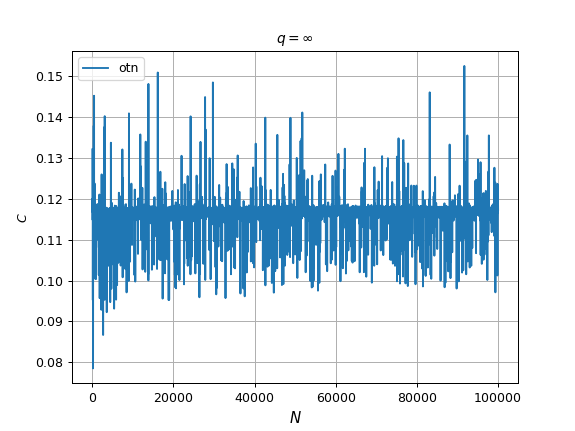

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(nrange, plt1, label = 'otn')
#plt.plot(range(10, int(1e3), 10), plt2, label = 'theor')
plt.xlabel(r"$N$", fontsize=12)
plt.ylabel(r"$C$", fontsize=10)
plt.title(r"$q = \infty$", fontsize = 11);
plt.legend()